<a href="https://colab.research.google.com/github/VishardMehta/Traffic-sign-Yolo/blob/main/Yolov11_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

if 'COLAB_GPU' in os.environ:
  print("GPU is enabled")
else:
  print("GPU is not enabled")

GPU is enabled


In [2]:
!pip install ultralytics

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/112.6 GB disk)


In [4]:
%pwd

'/content'

In [5]:
!mkdir RoadSignDet

mkdir: cannot create directory ‘RoadSignDet’: File exists


In [6]:
os.chdir("/content/")

In [7]:
%pwd

'/content'

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LK4qXeI57vSTdn5hhL69")
project = rf.workspace("projects-7mfur").project("traffic-sign-recognition-iokfc-j5xmm")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LK4qXeI57vSTdn5hhL69")
project = rf.workspace("projects-7mfur").project("traffic-sign-recognition-iokfc-j5xmm")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


# Task
Train a YOLOv11 detection model using the downloaded dataset with the command `!yolo task=detect mode=train model=yolov11n.pt data=./Traffic-Sign-Recognition-1/data.yaml imgsz=640 epochs=50 batch=16`.

## Confirm Working Directory

### Subtask:
Confirm that the current working directory is '/content/RoadSignDet' to ensure correct data path for training.


**Reasoning**:
The subtask requires confirming the current working directory. Executing `!pwd` will show the current directory, which should be `/content/RoadSignDet` as per the instructions.



In [9]:
%%bash
pwd

/content


## Train YOLO Model

### Subtask:
Train a YOLOv11 detection model using the downloaded dataset.


In [10]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/Traffic-Sign-Recognition-1/data.yaml imgsz=640 epochs=50 batch=16


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Traffic-Sign-Recognition-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

### F1 Curve

In [12]:
from IPython.display import Image
Image('/content/runs/detect/train/F1_curve.png')

FileNotFoundError: No such file or directory: '/content/runs/detect/train/F1_curve.png'

FileNotFoundError: No such file or directory: '/content/runs/detect/train/F1_curve.png'

<IPython.core.display.Image object>

### Confusion Matrix

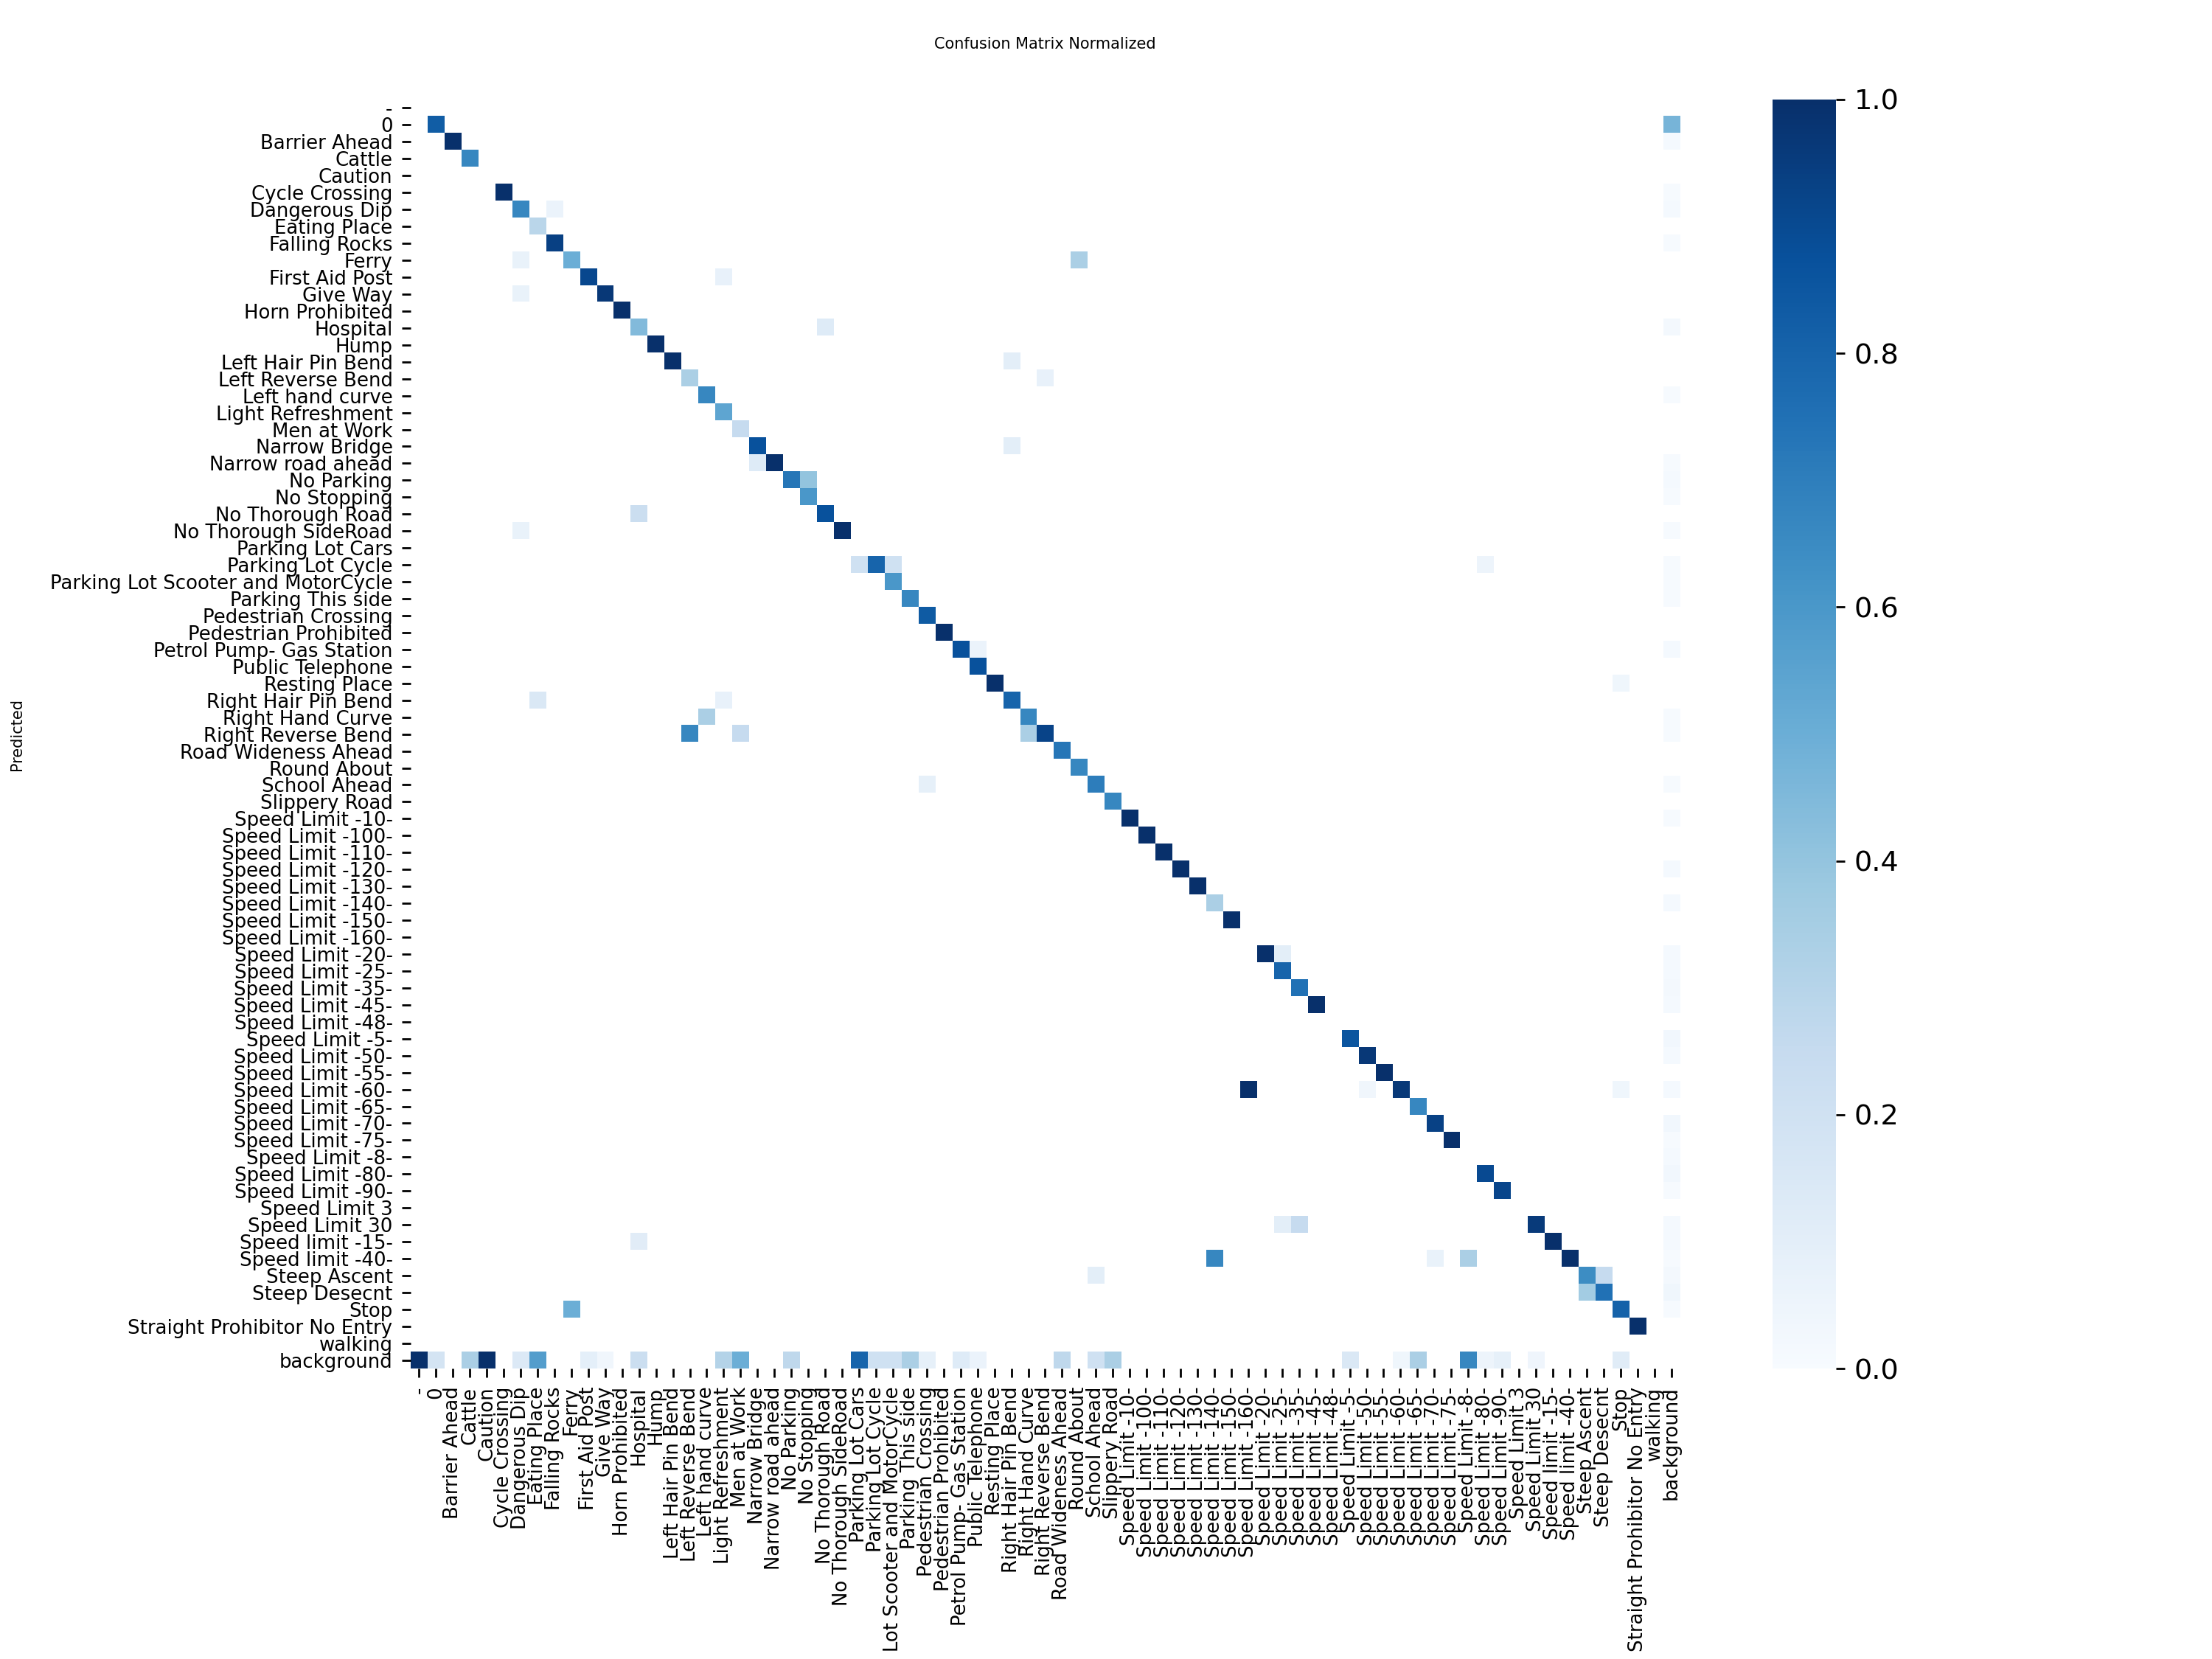

In [18]:
from IPython.display import Image
Image('/content/runs/detect/train/confusion_matrix_normalized.png')

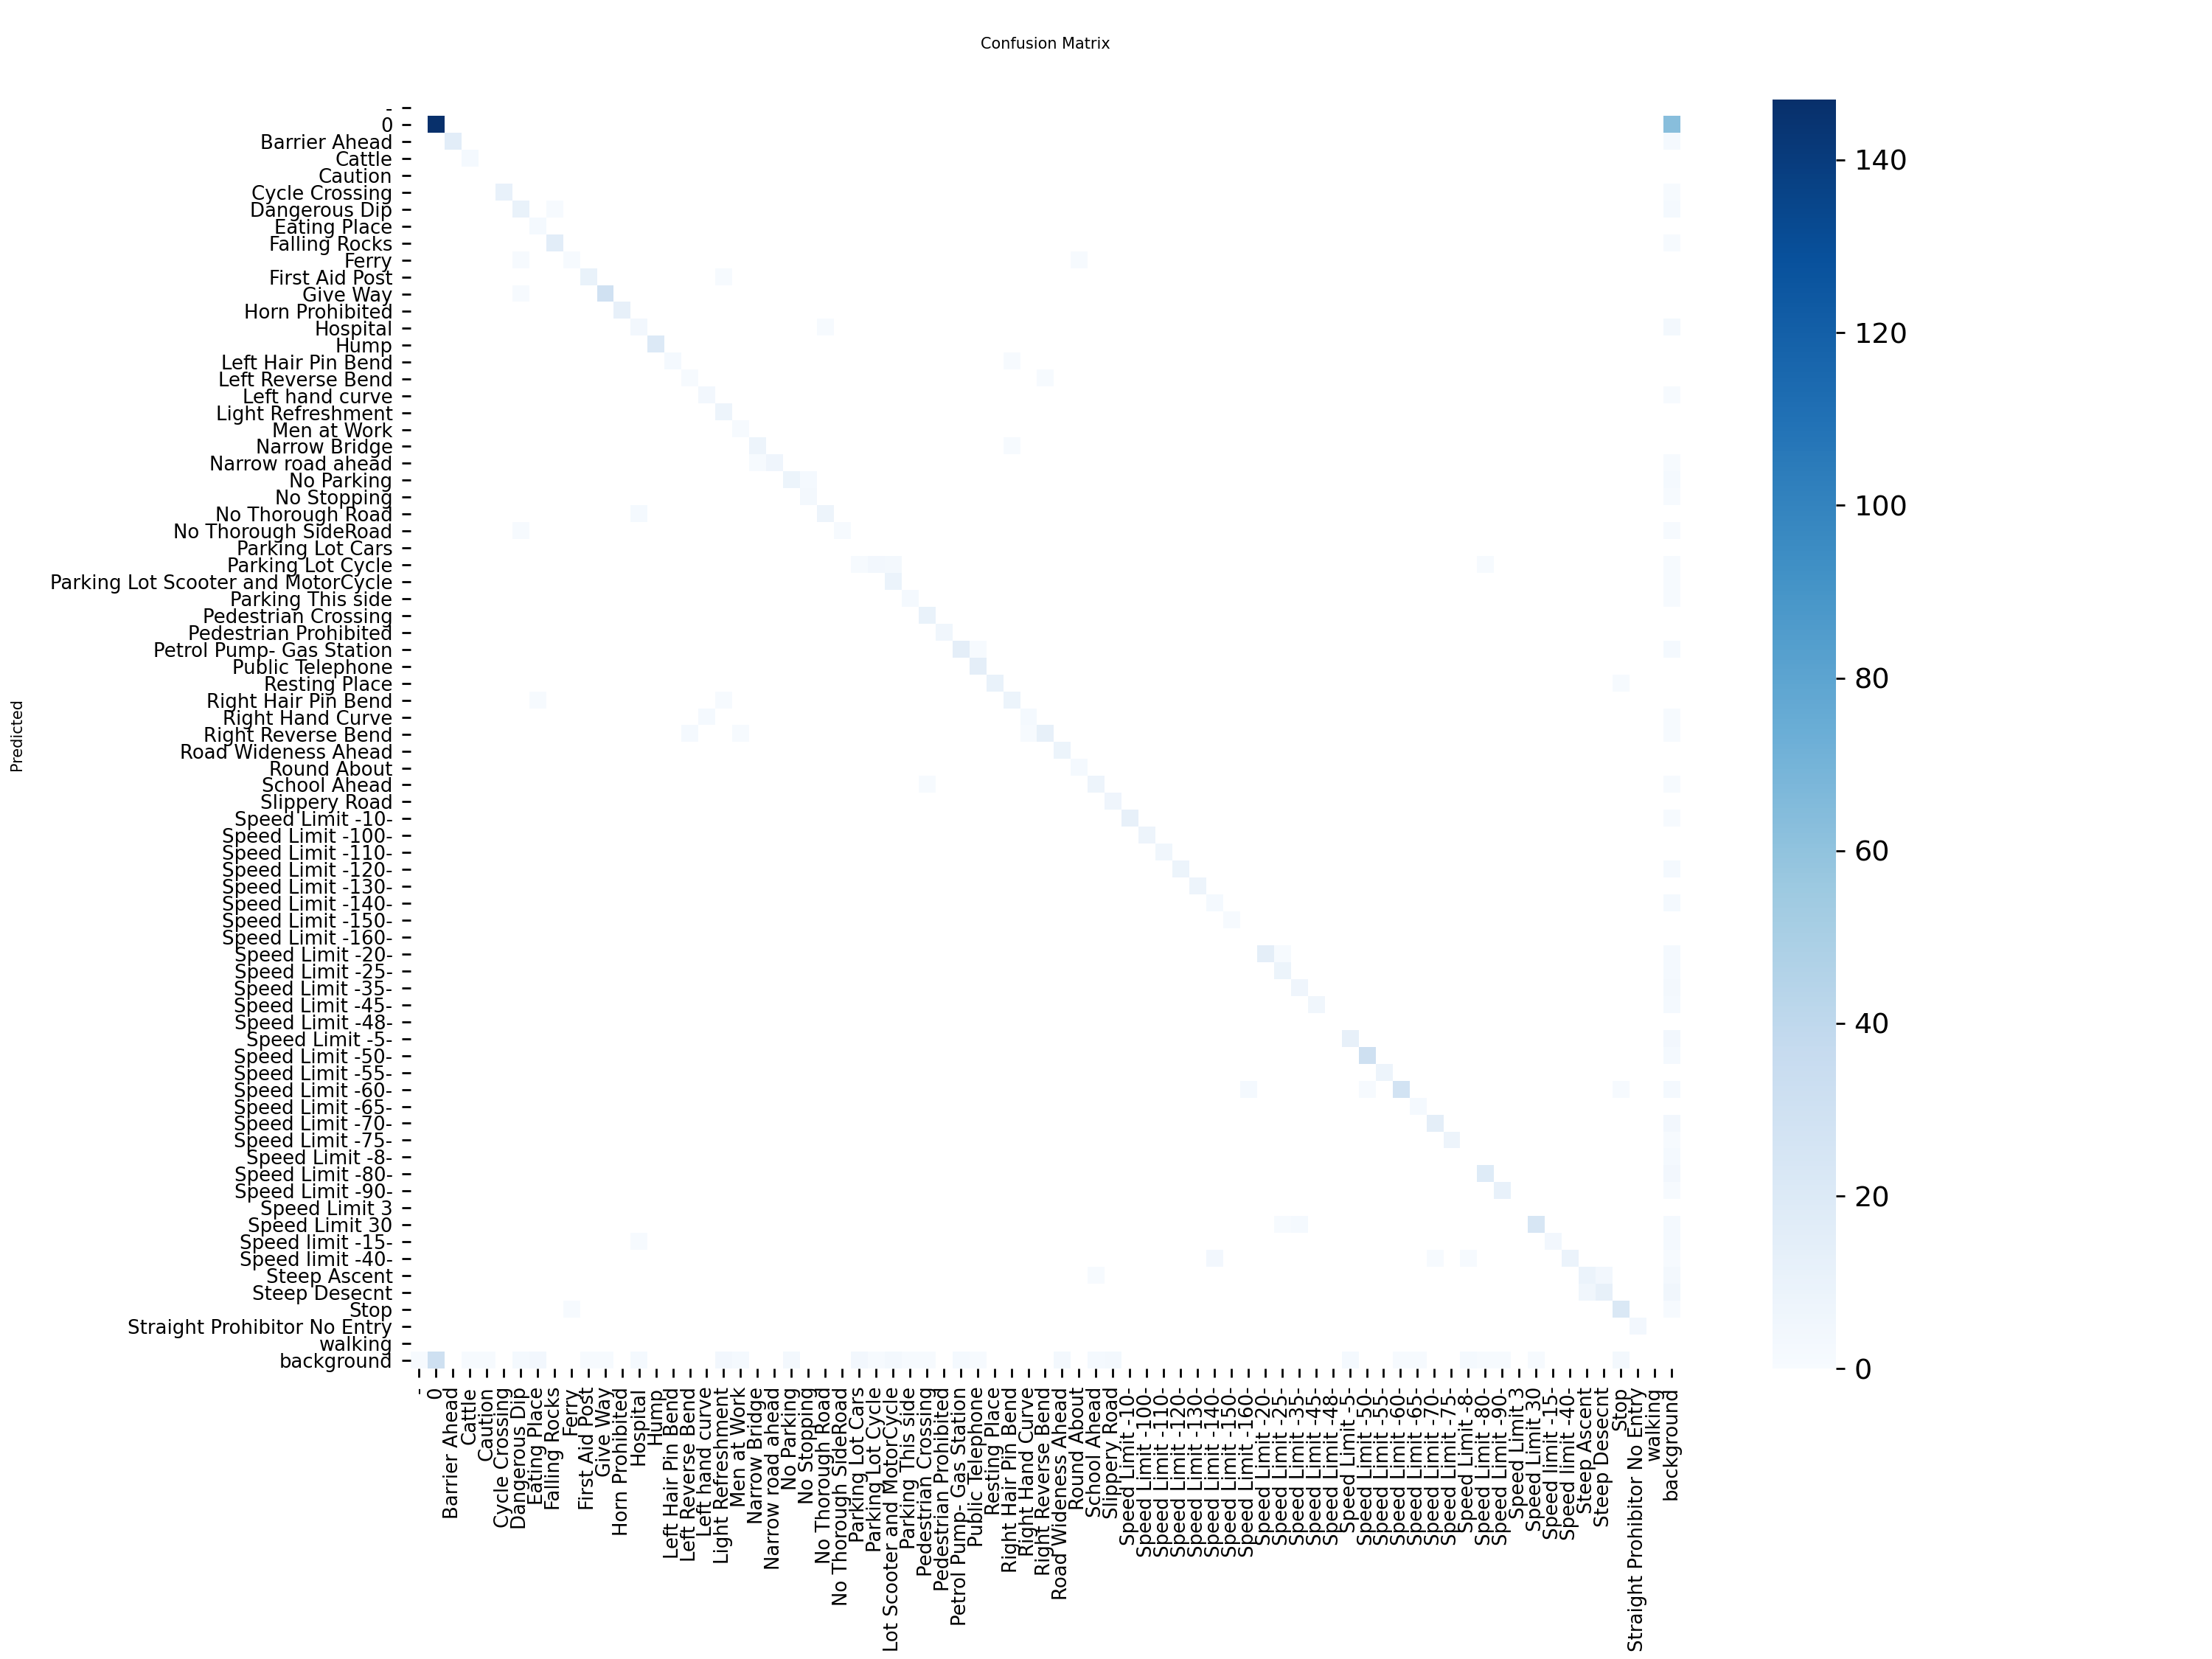

In [22]:
from IPython.display import Image
Image('/content/runs/detect/train/confusion_matrix.png')

### Label Distribution

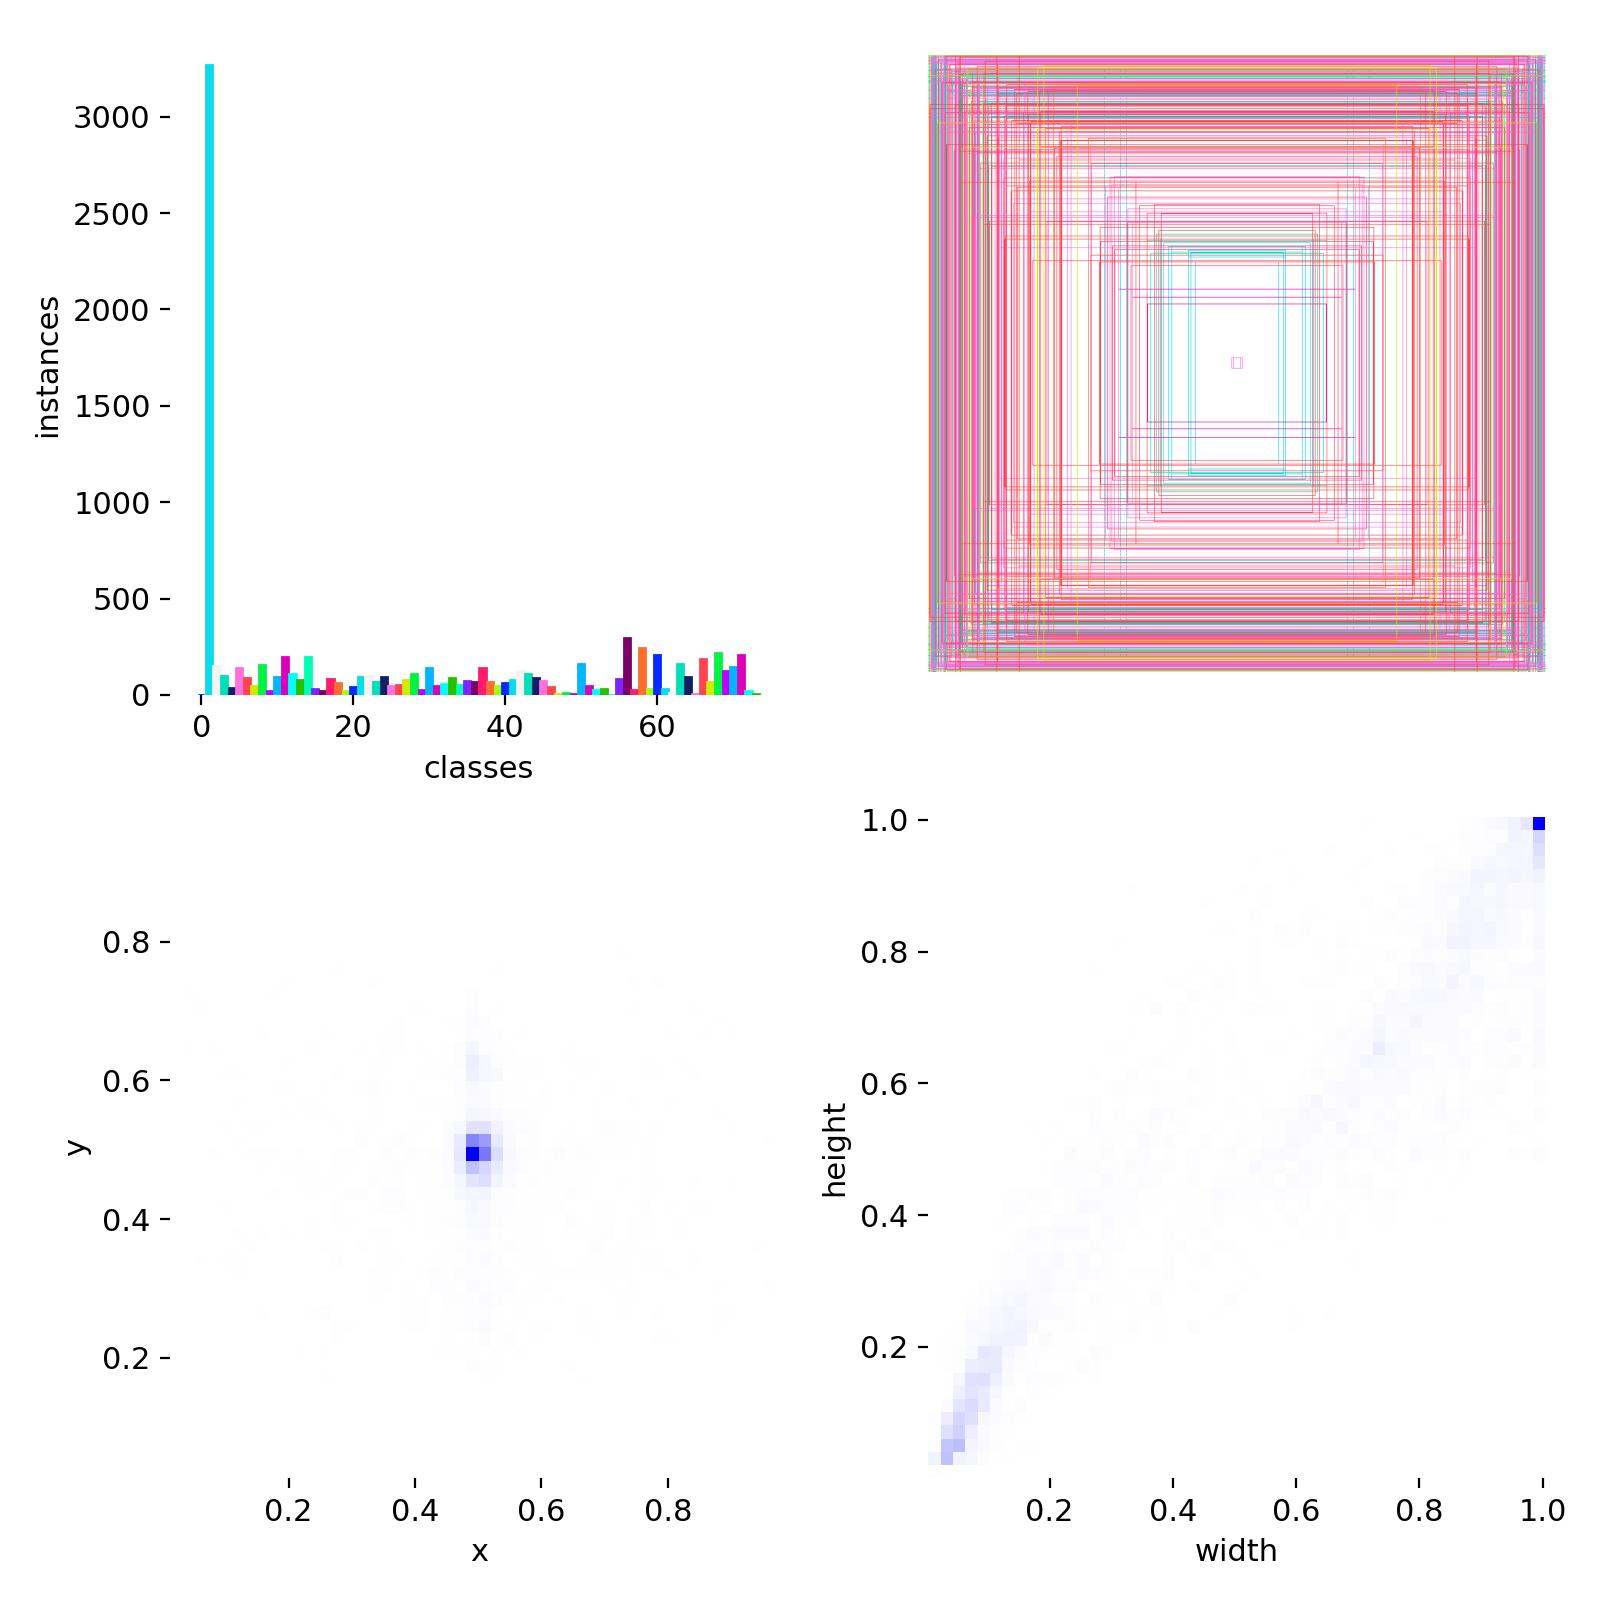

In [25]:
from IPython.display import Image
Image('/content/runs/detect/train/labels.jpg')

### Label Correlogram

### Validation Batch Labels

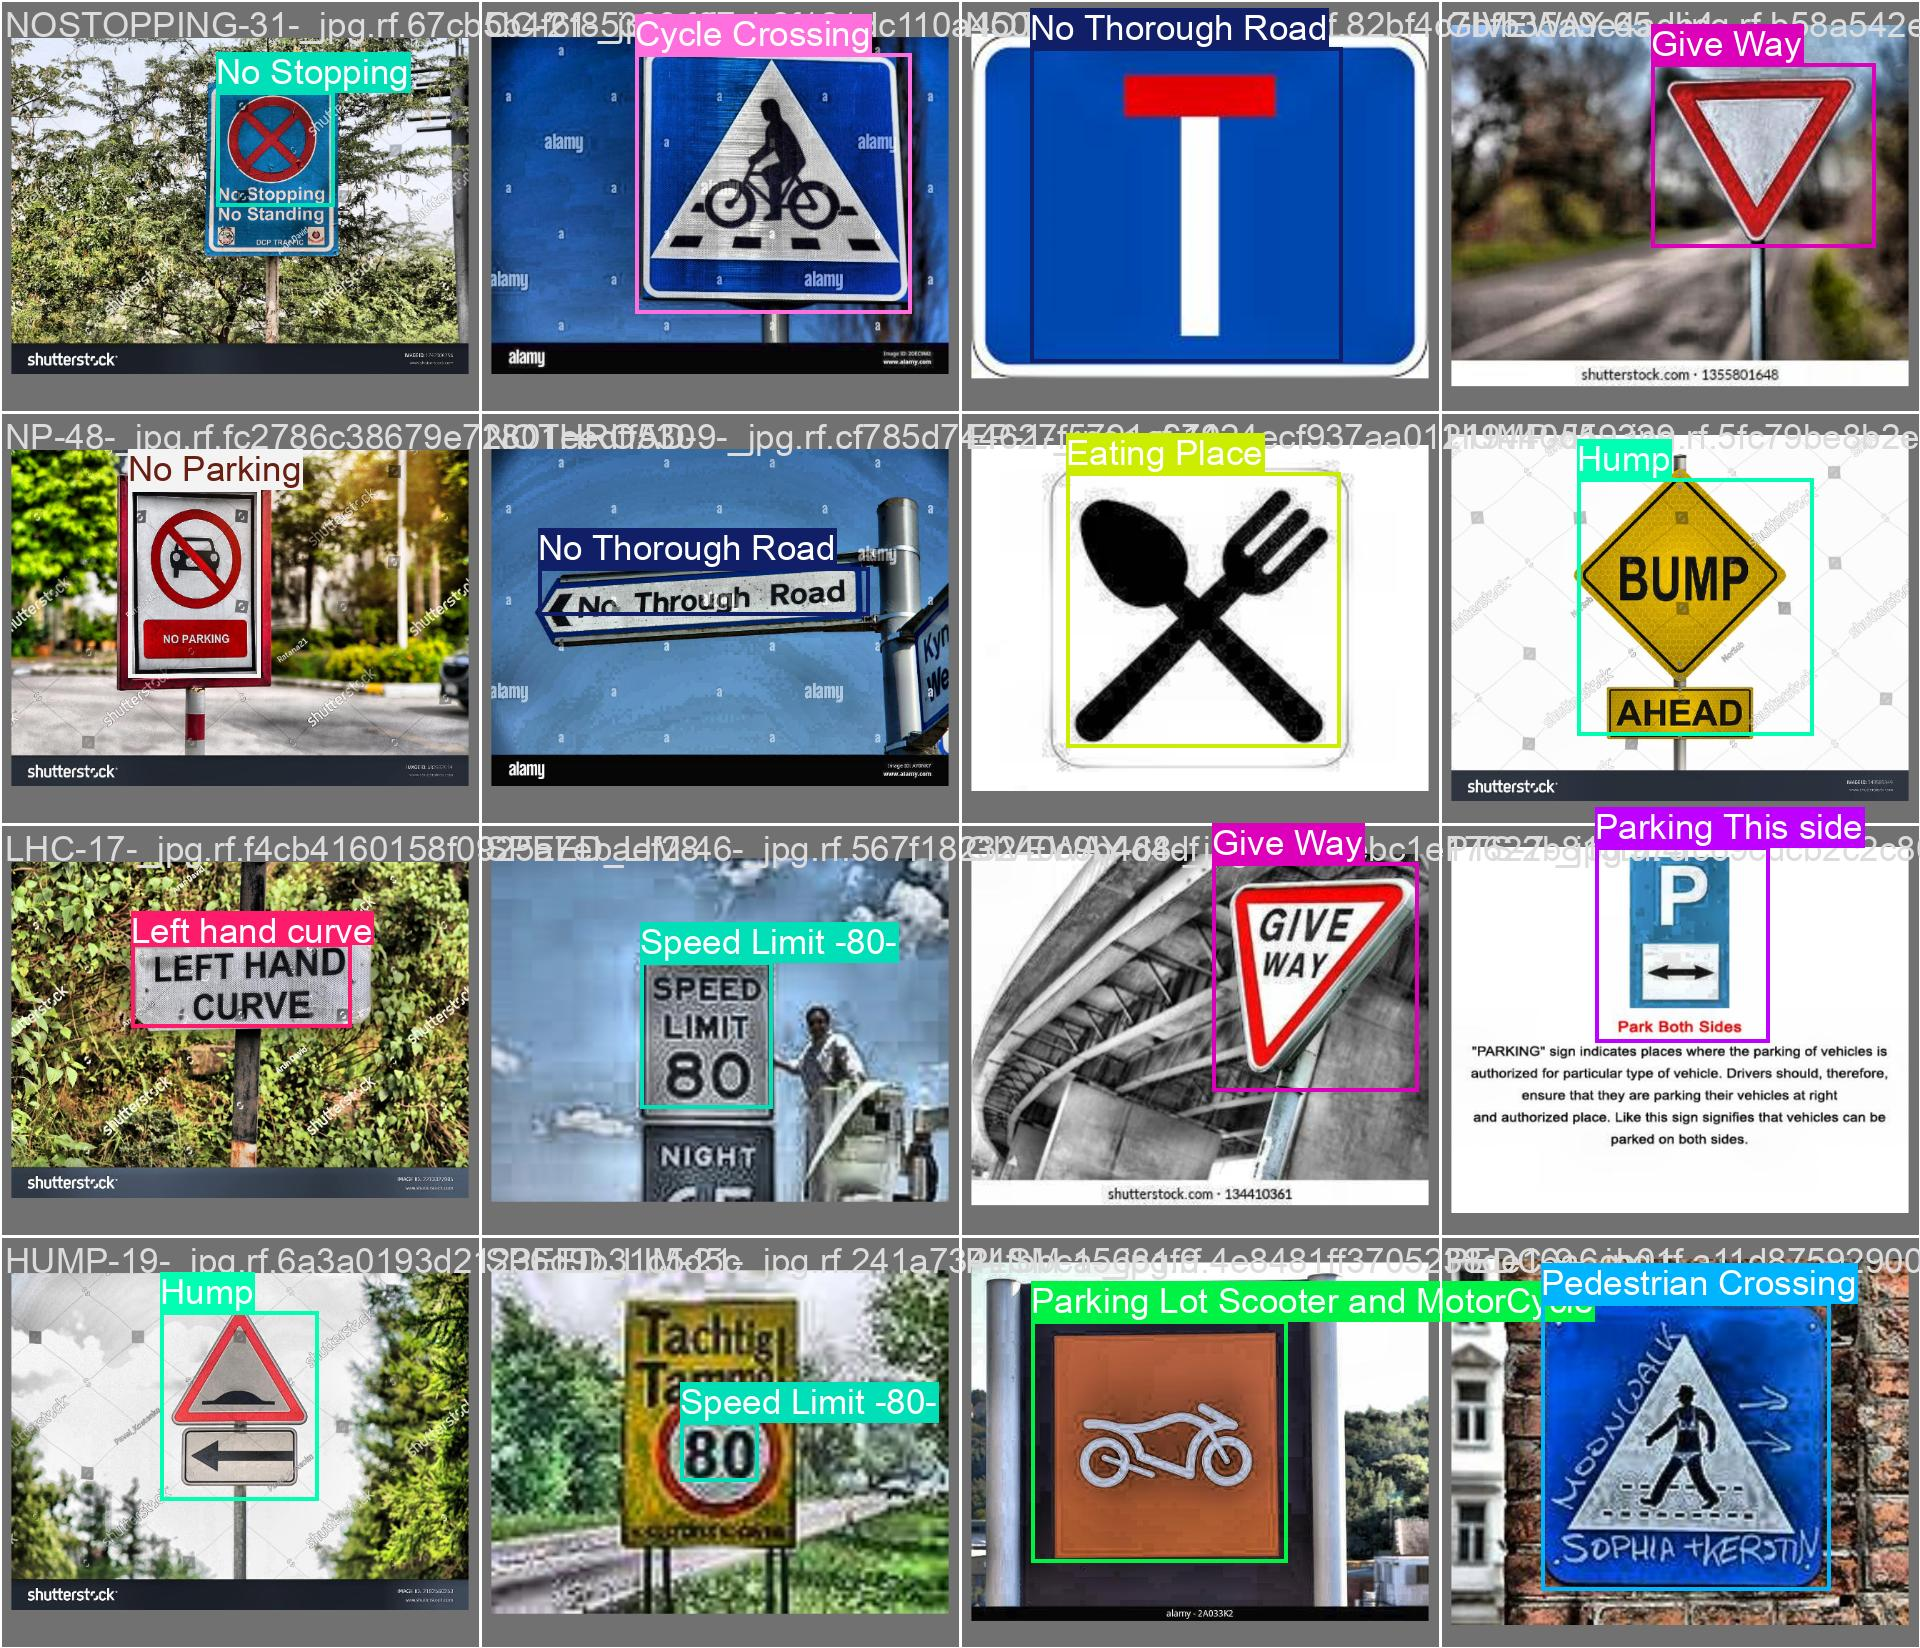

In [27]:
from IPython.display import Image
Image('/content/runs/detect/train/val_batch2_labels.jpg')

### Validation Batch Predictions

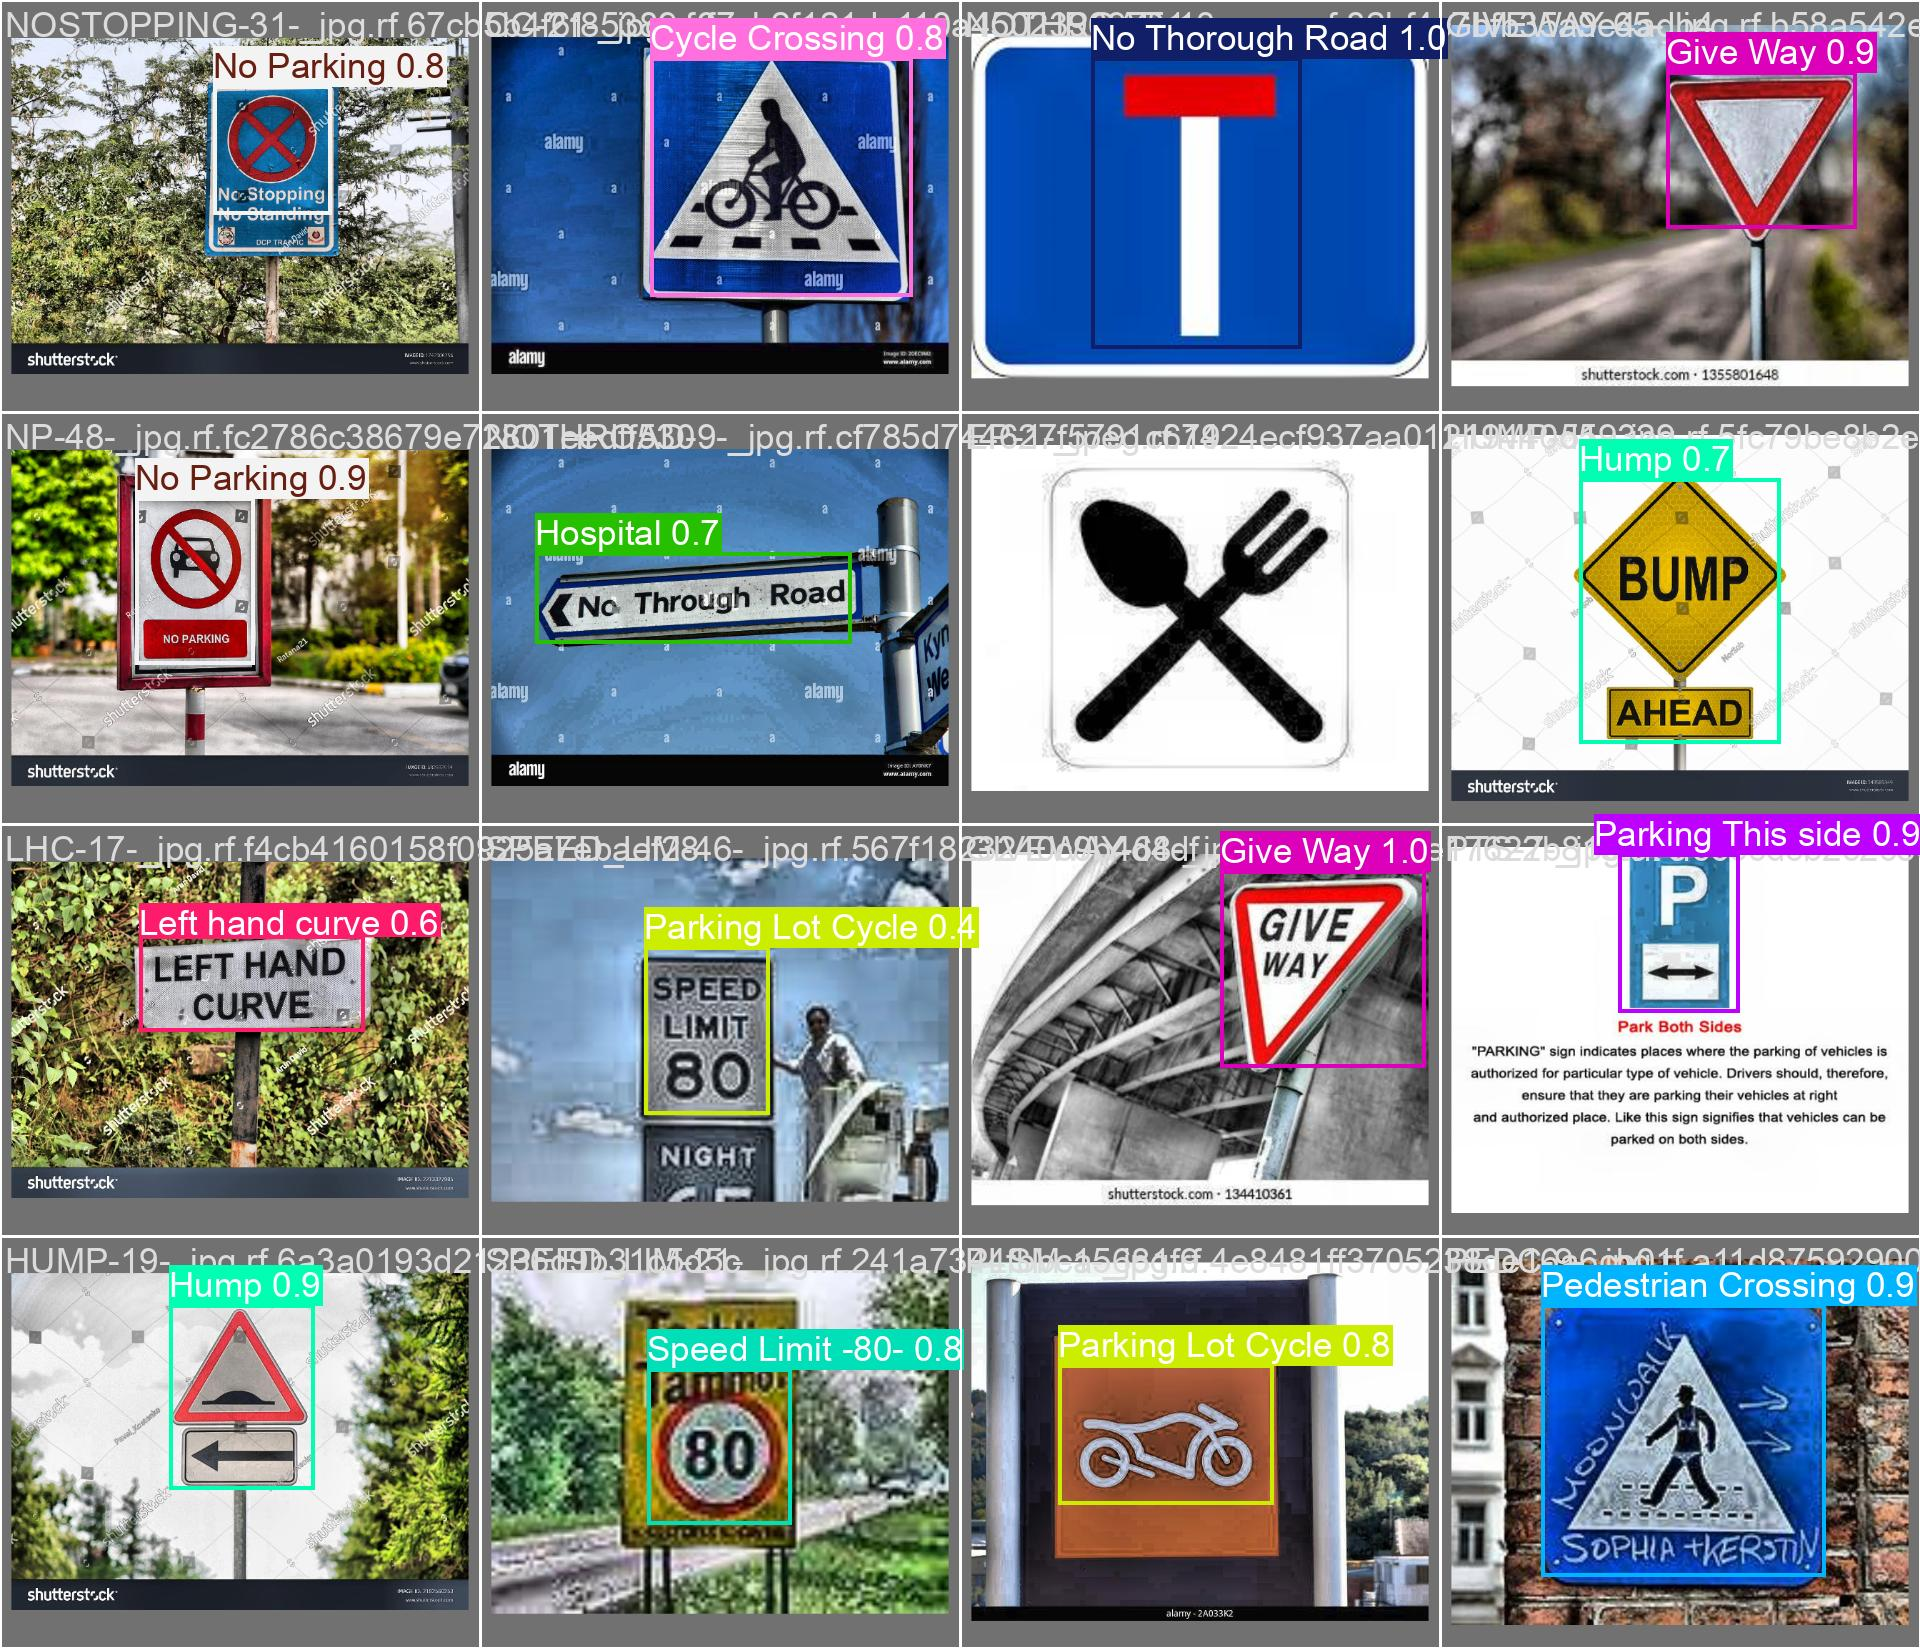

In [28]:
from IPython.display import Image
Image('/content/runs/detect/train/val_batch2_pred.jpg')

### P Curve

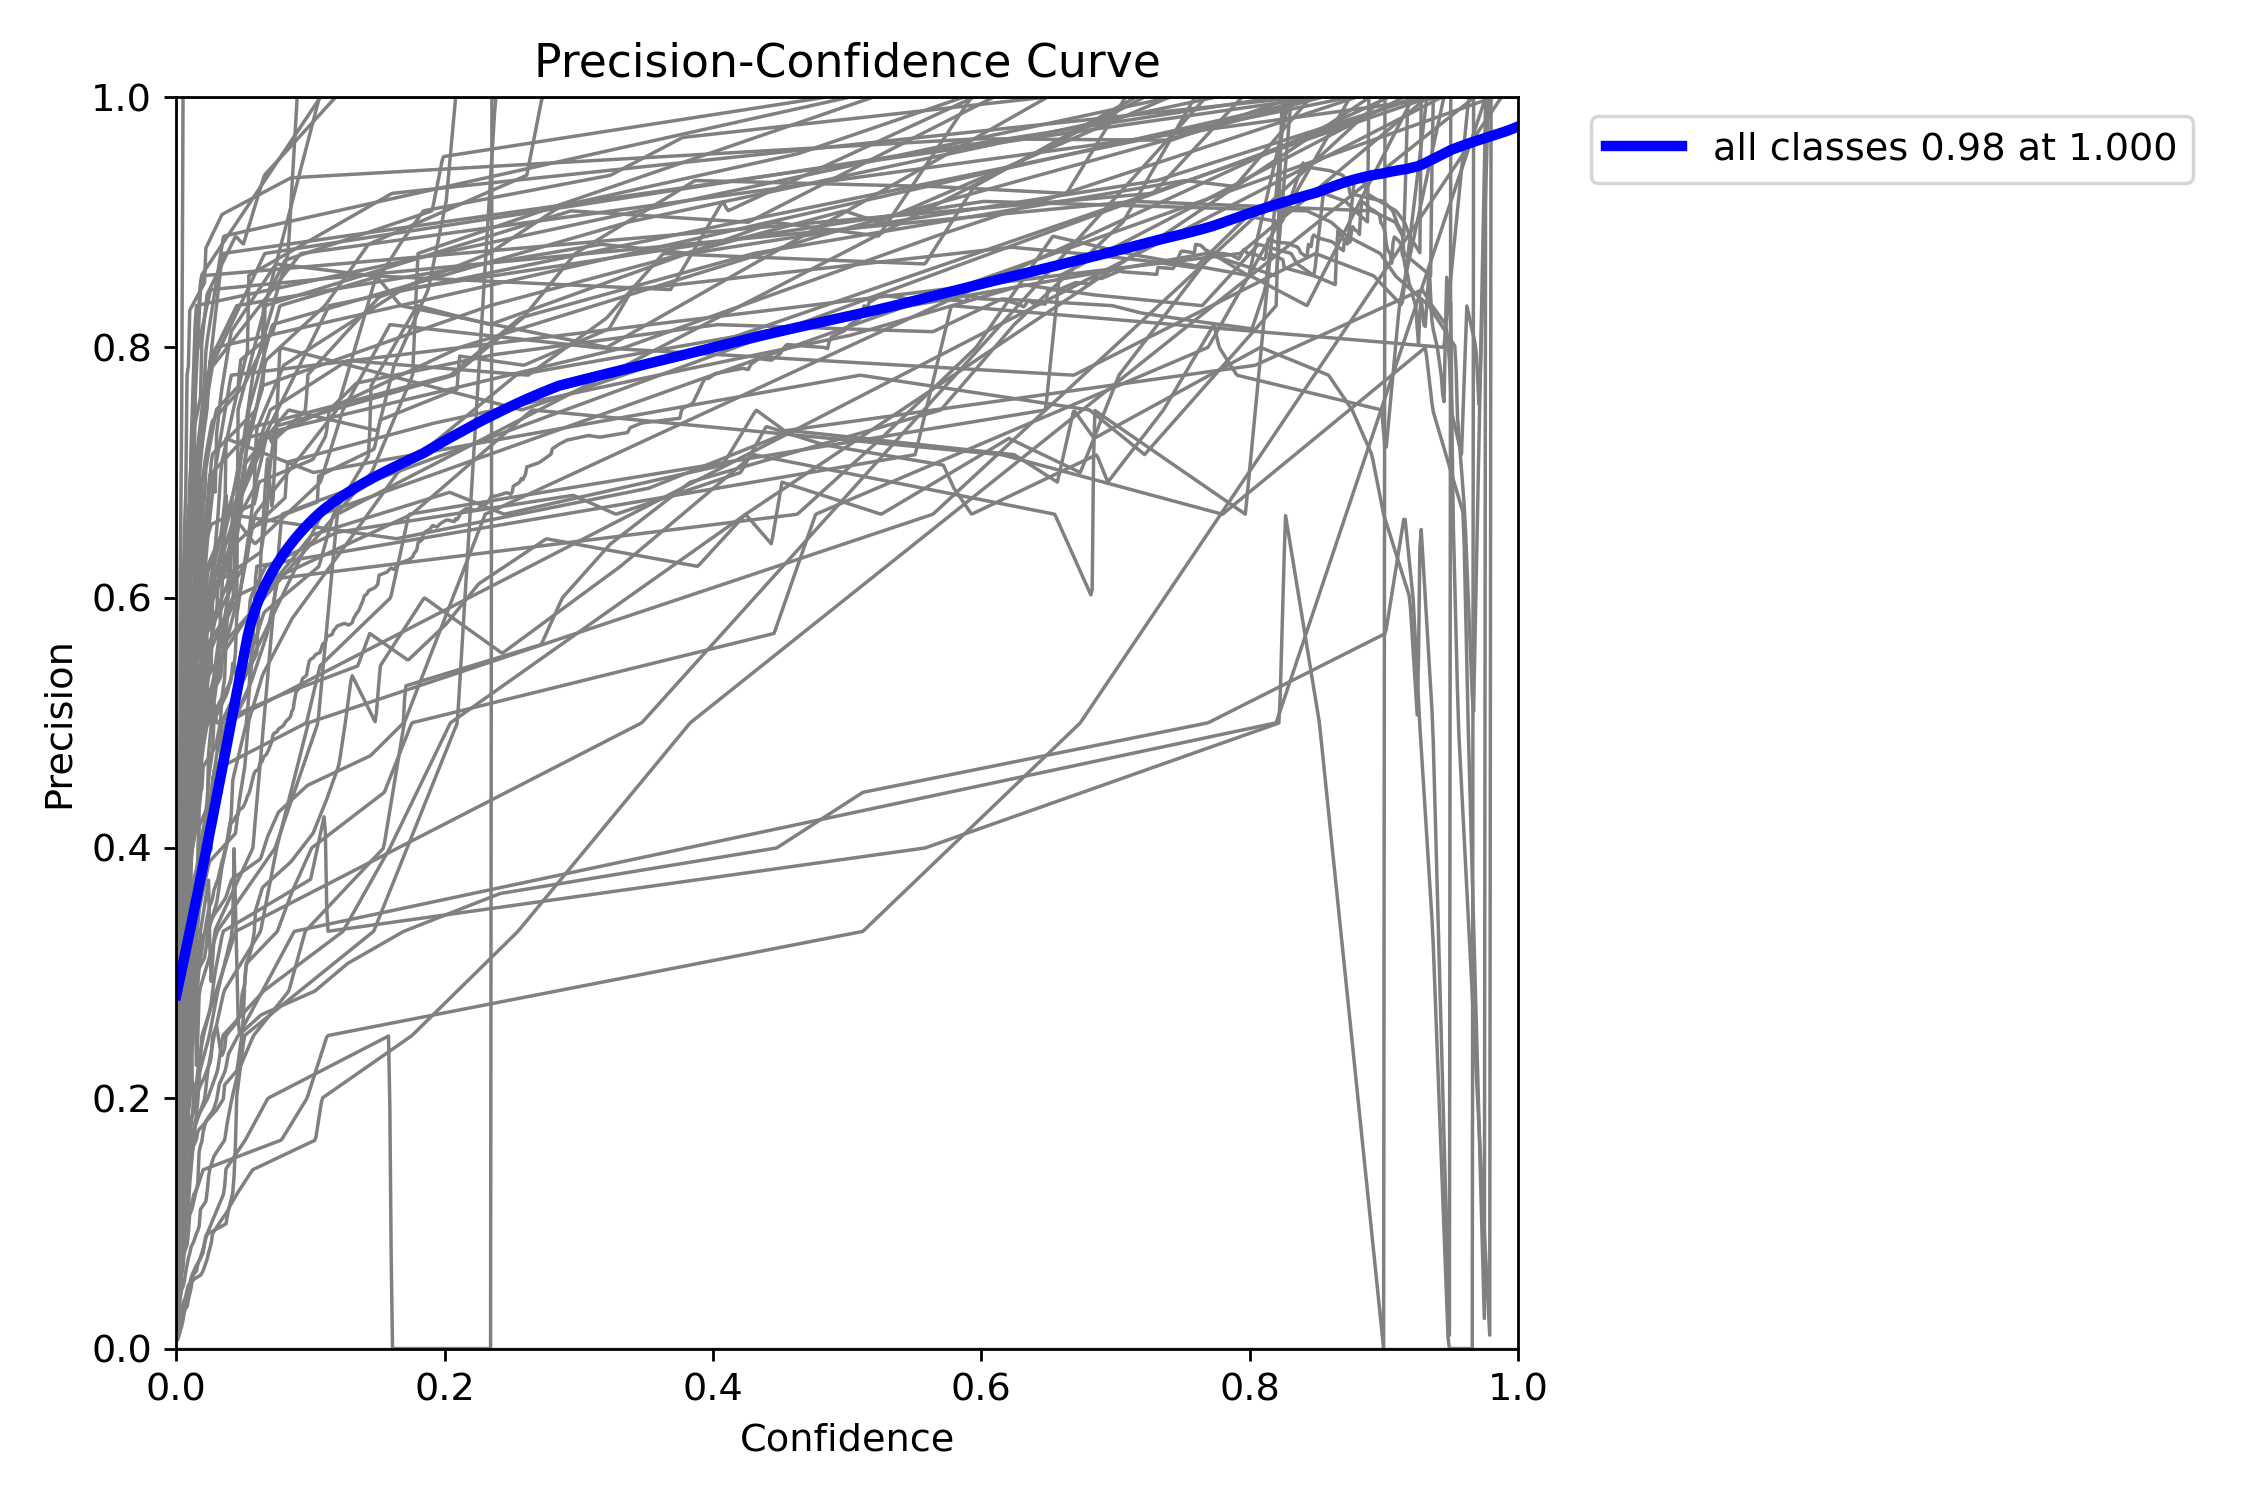

In [19]:
from IPython.display import Image
Image('/content/runs/detect/train/BoxP_curve.png')

### PR Curve

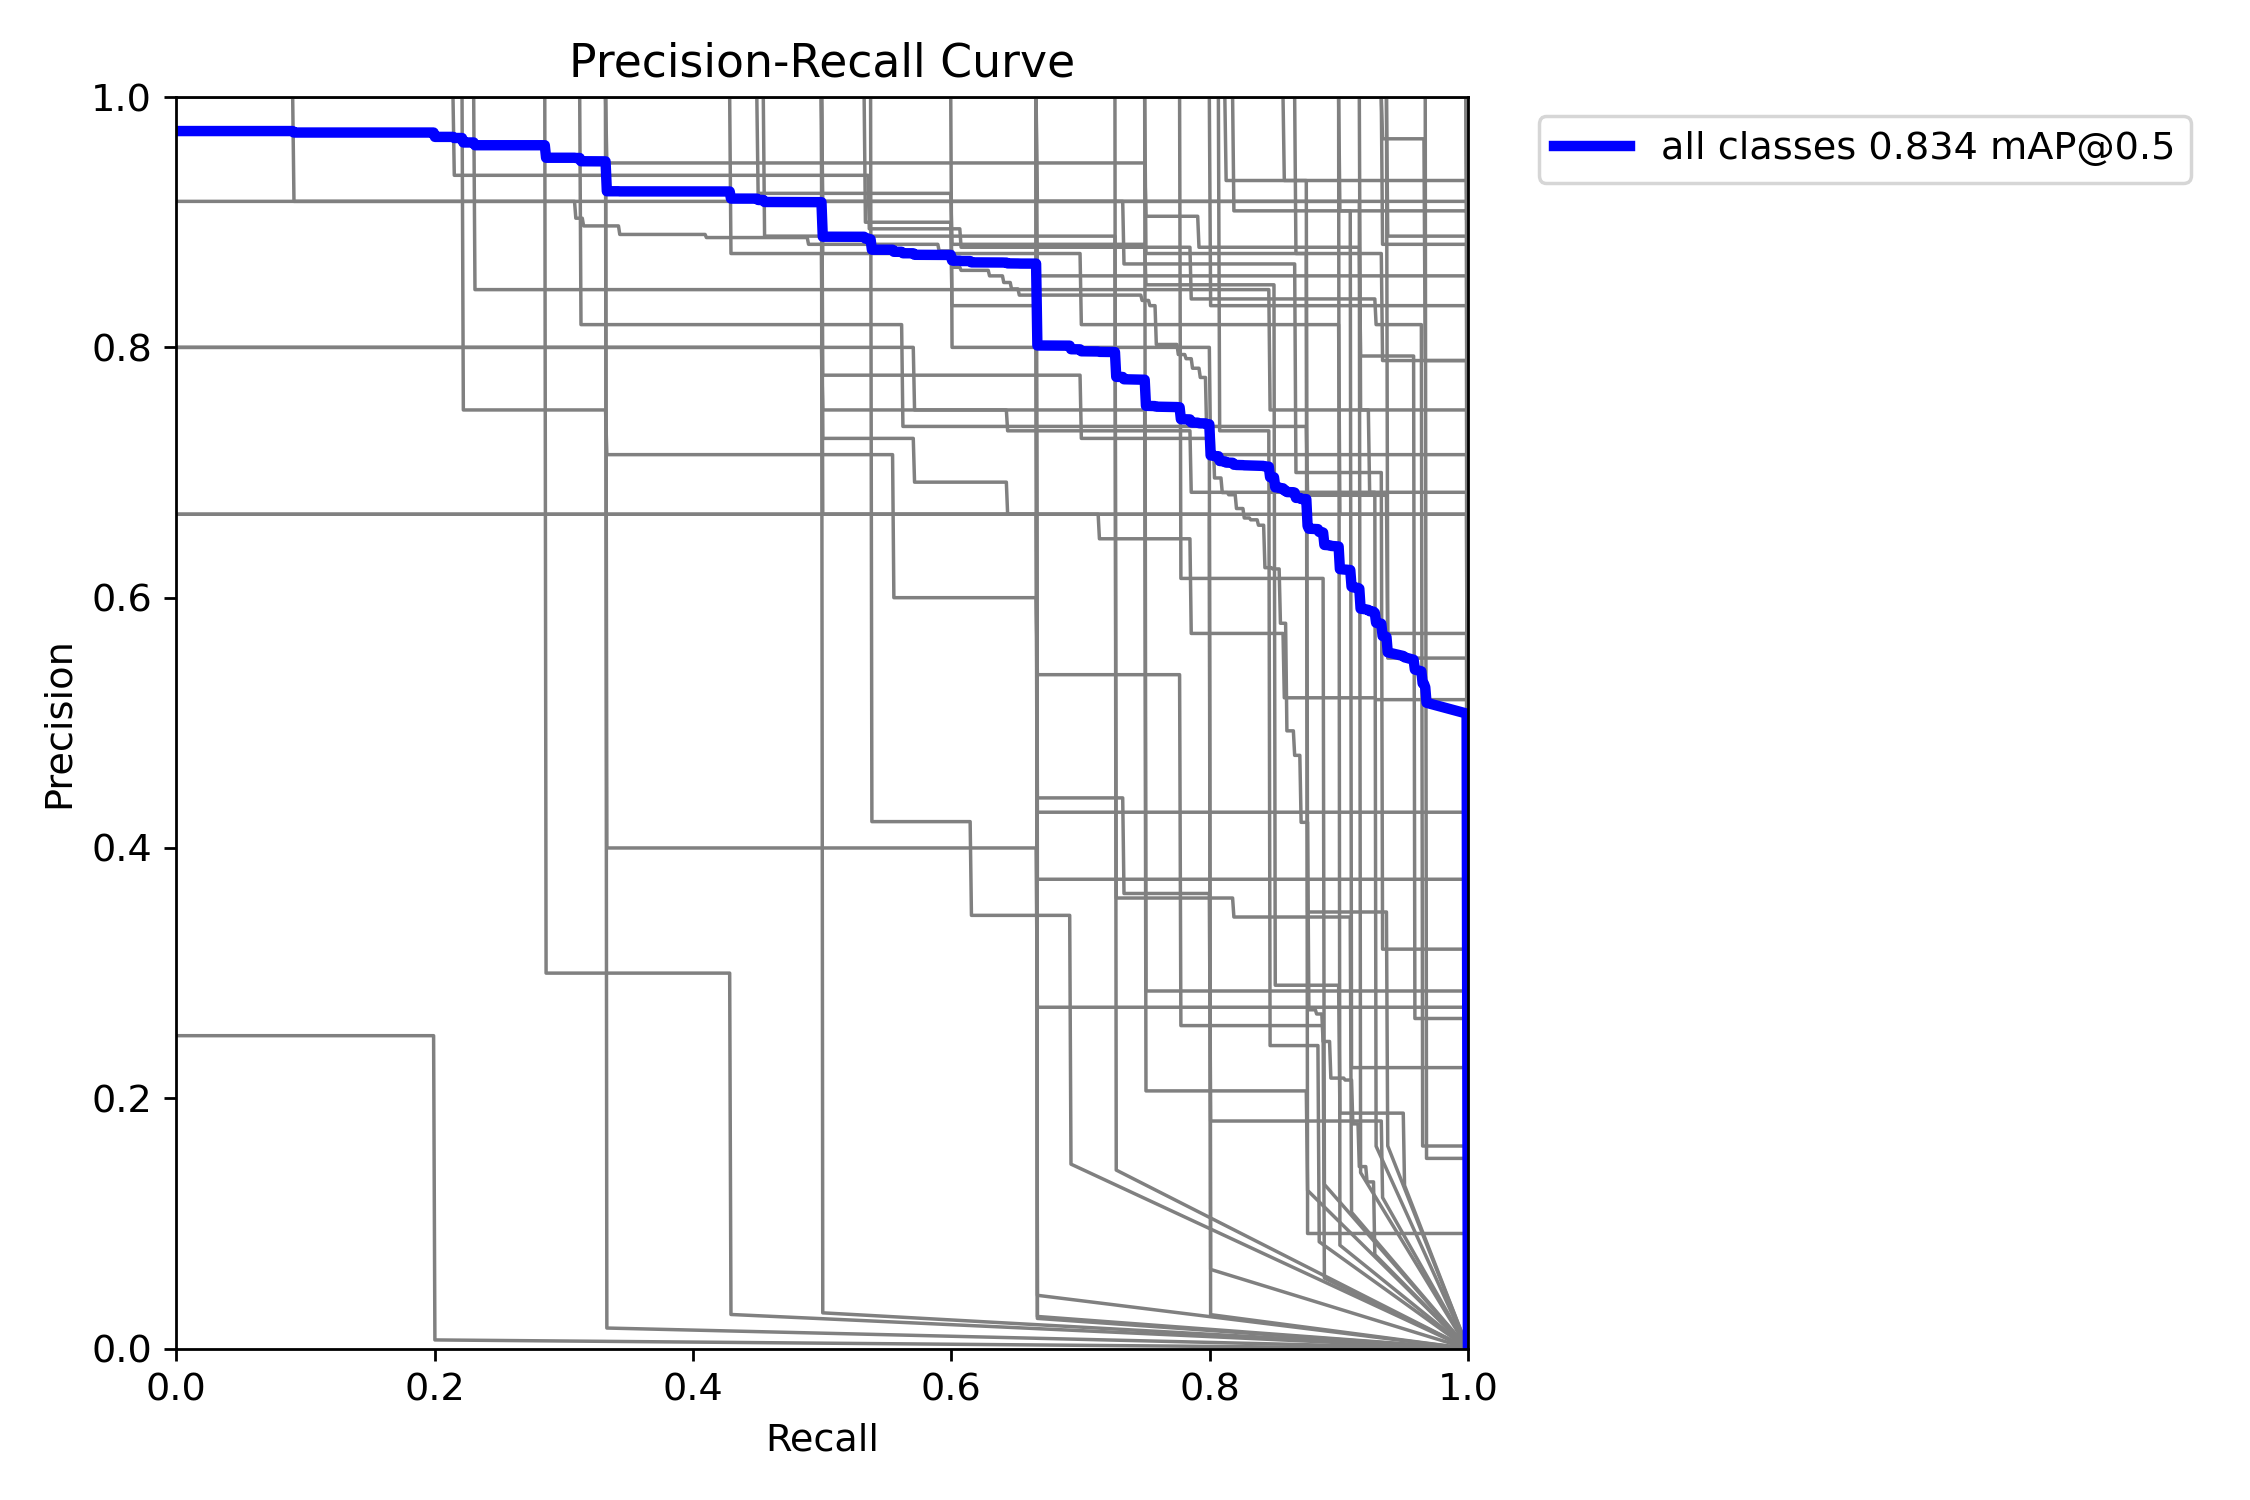

In [17]:
from IPython.display import Image
Image('/content/runs/detect/train/BoxPR_curve.png')

### Training Results (Metrics over Epochs)

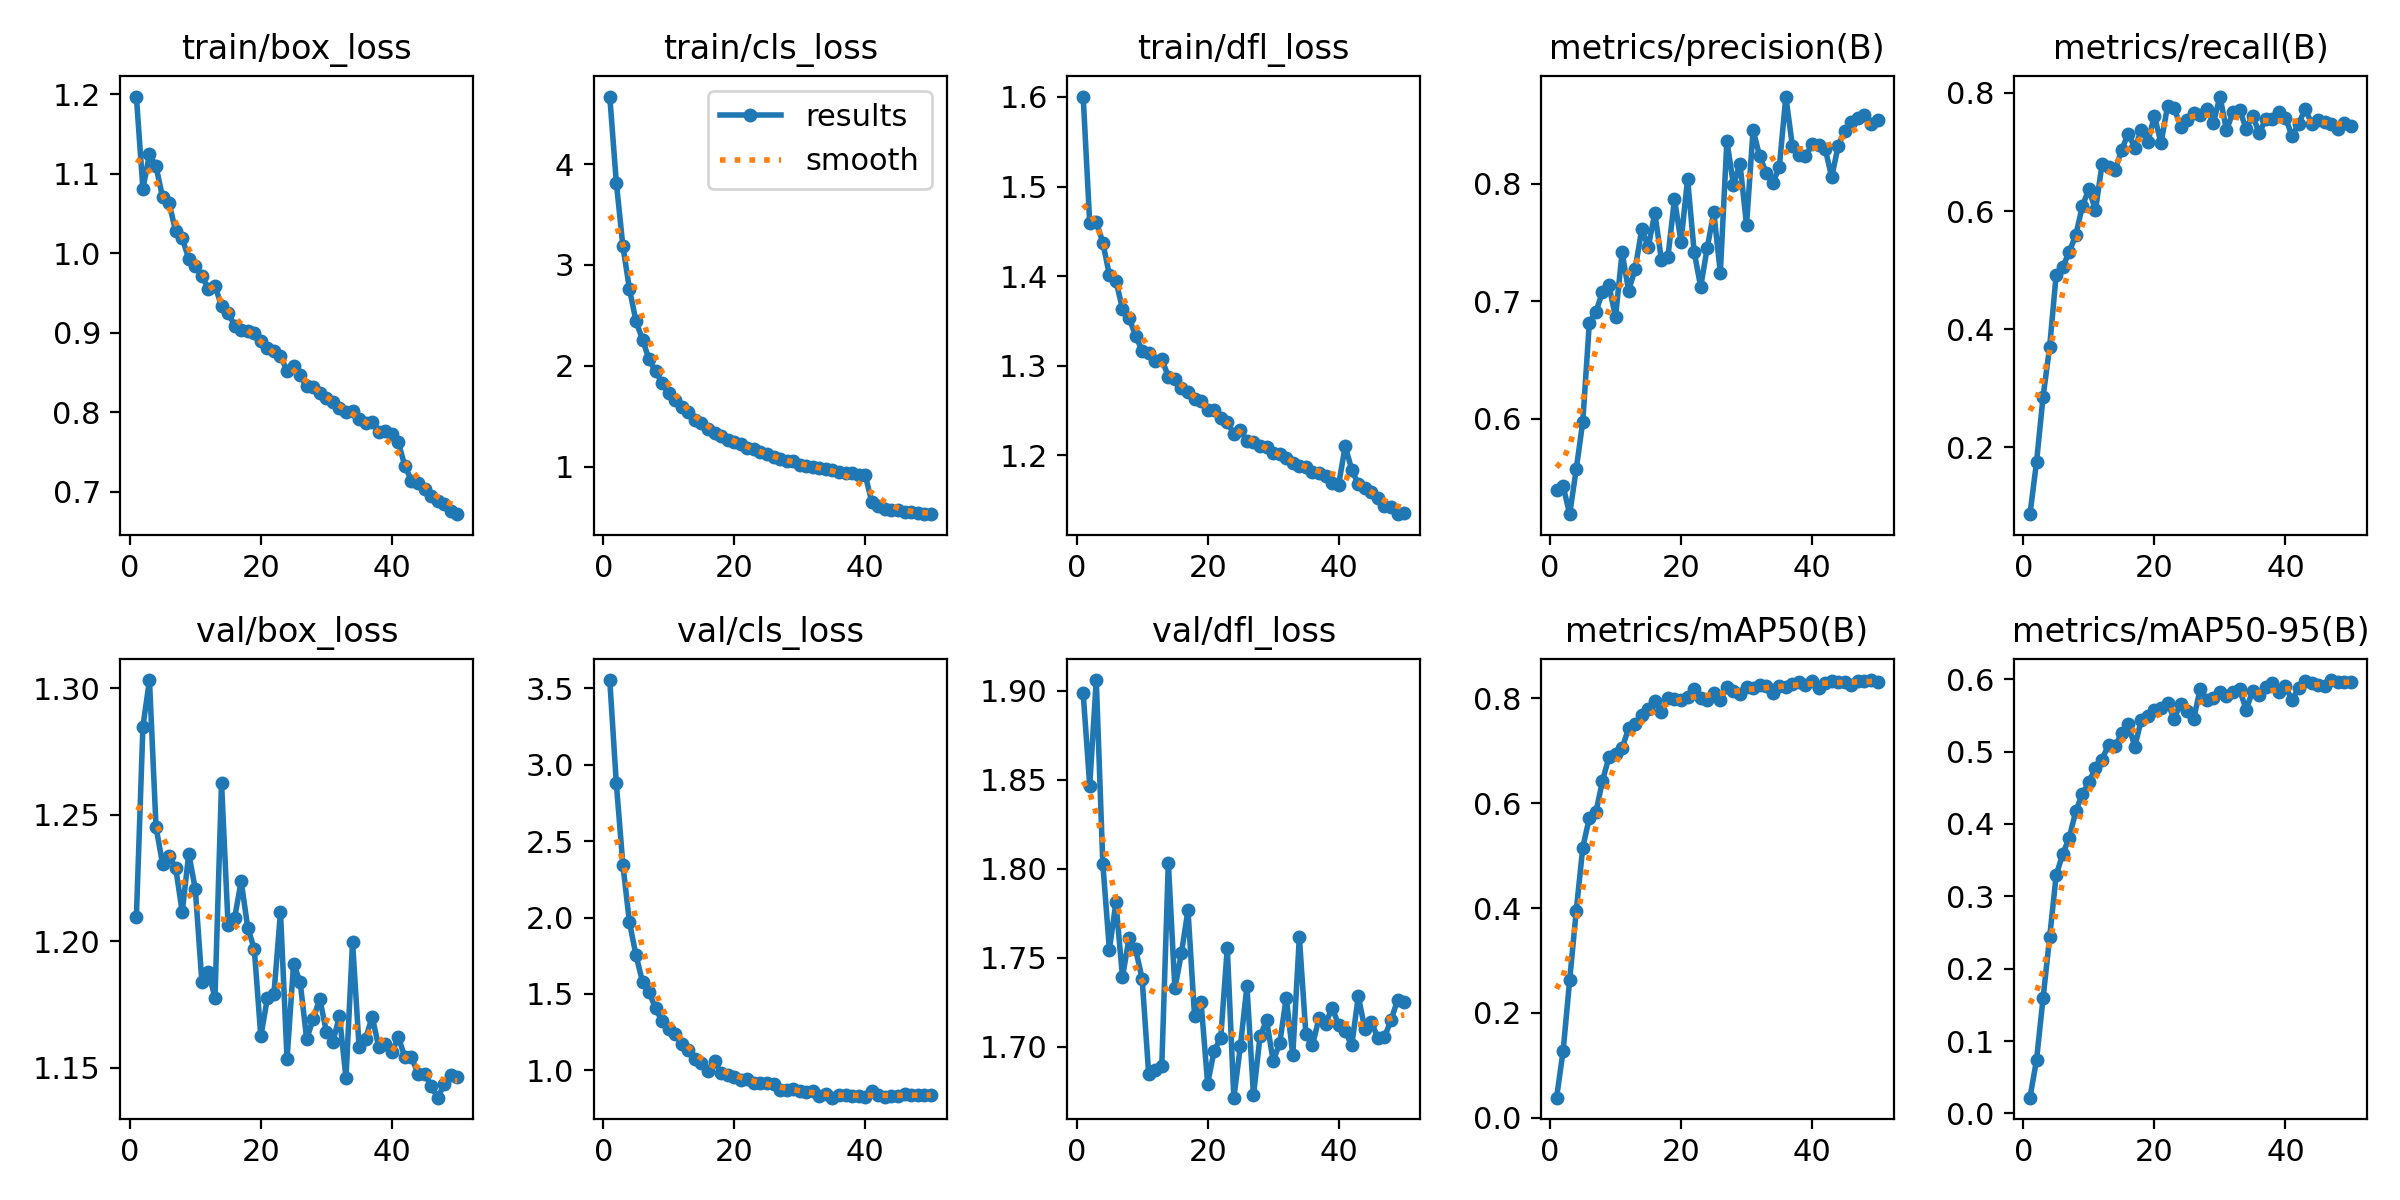

In [16]:
from IPython.display import Image
Image('/content/runs/detect/train/results.png')

### F1 Curve (Corrected)

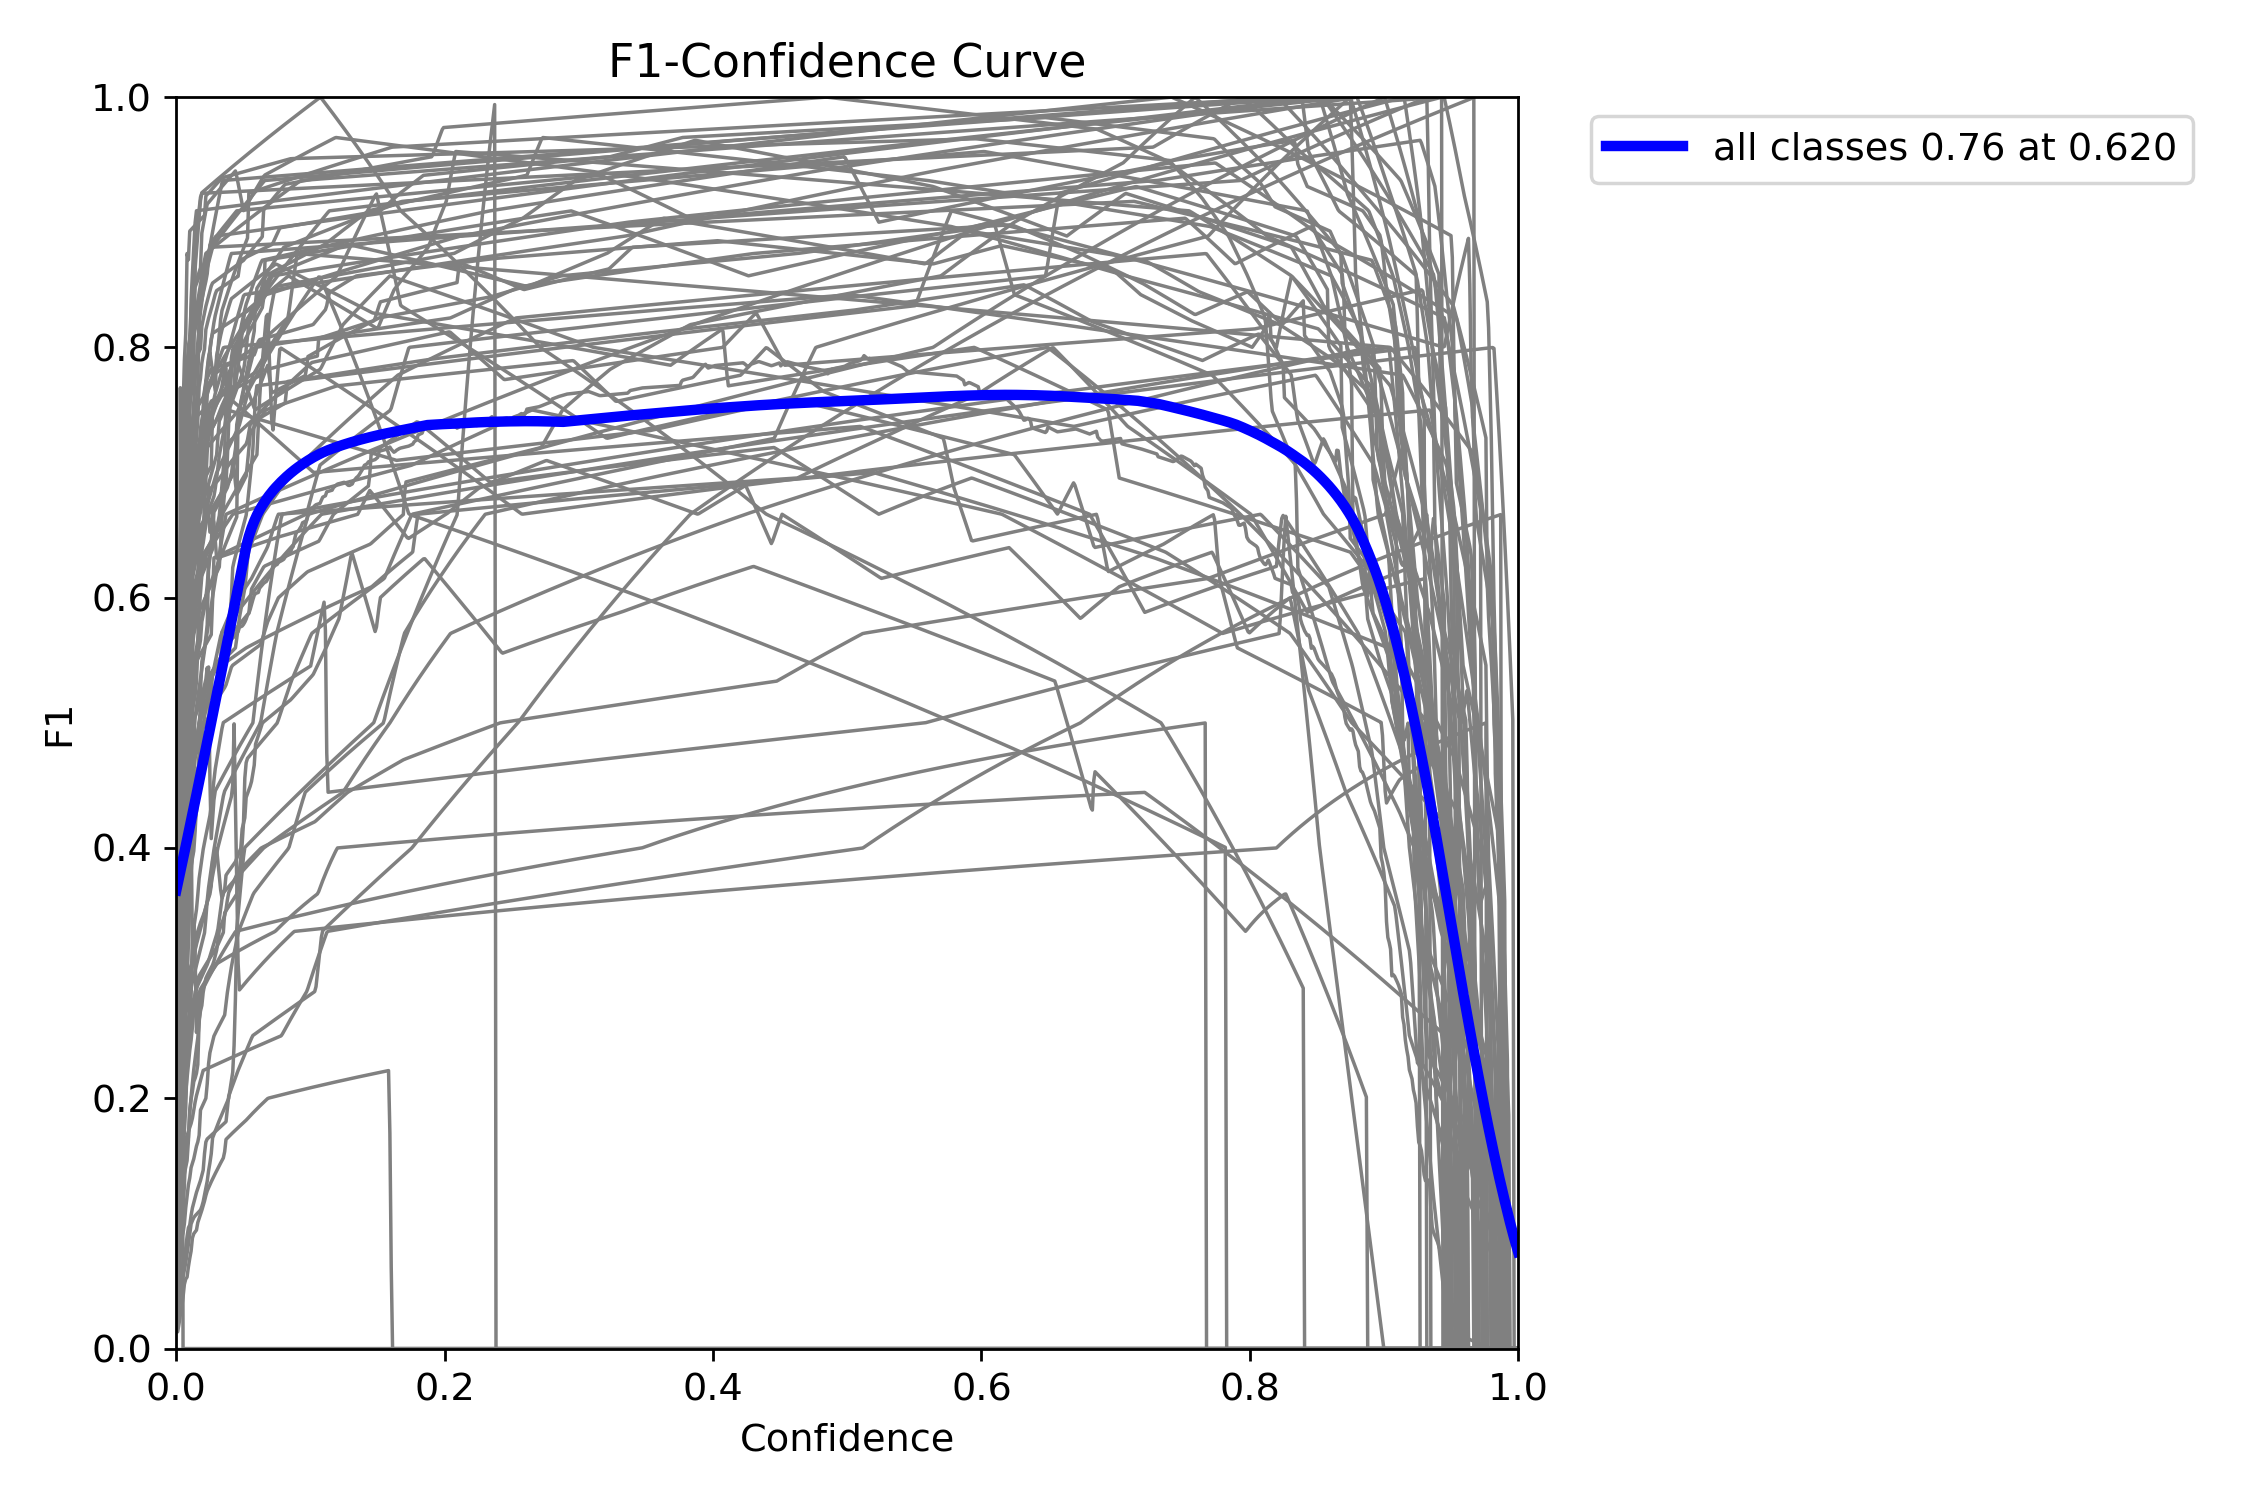

In [20]:
from IPython.display import Image
Image('/content/runs/detect/train/BoxF1_curve.png')

### R Curve (Corrected)

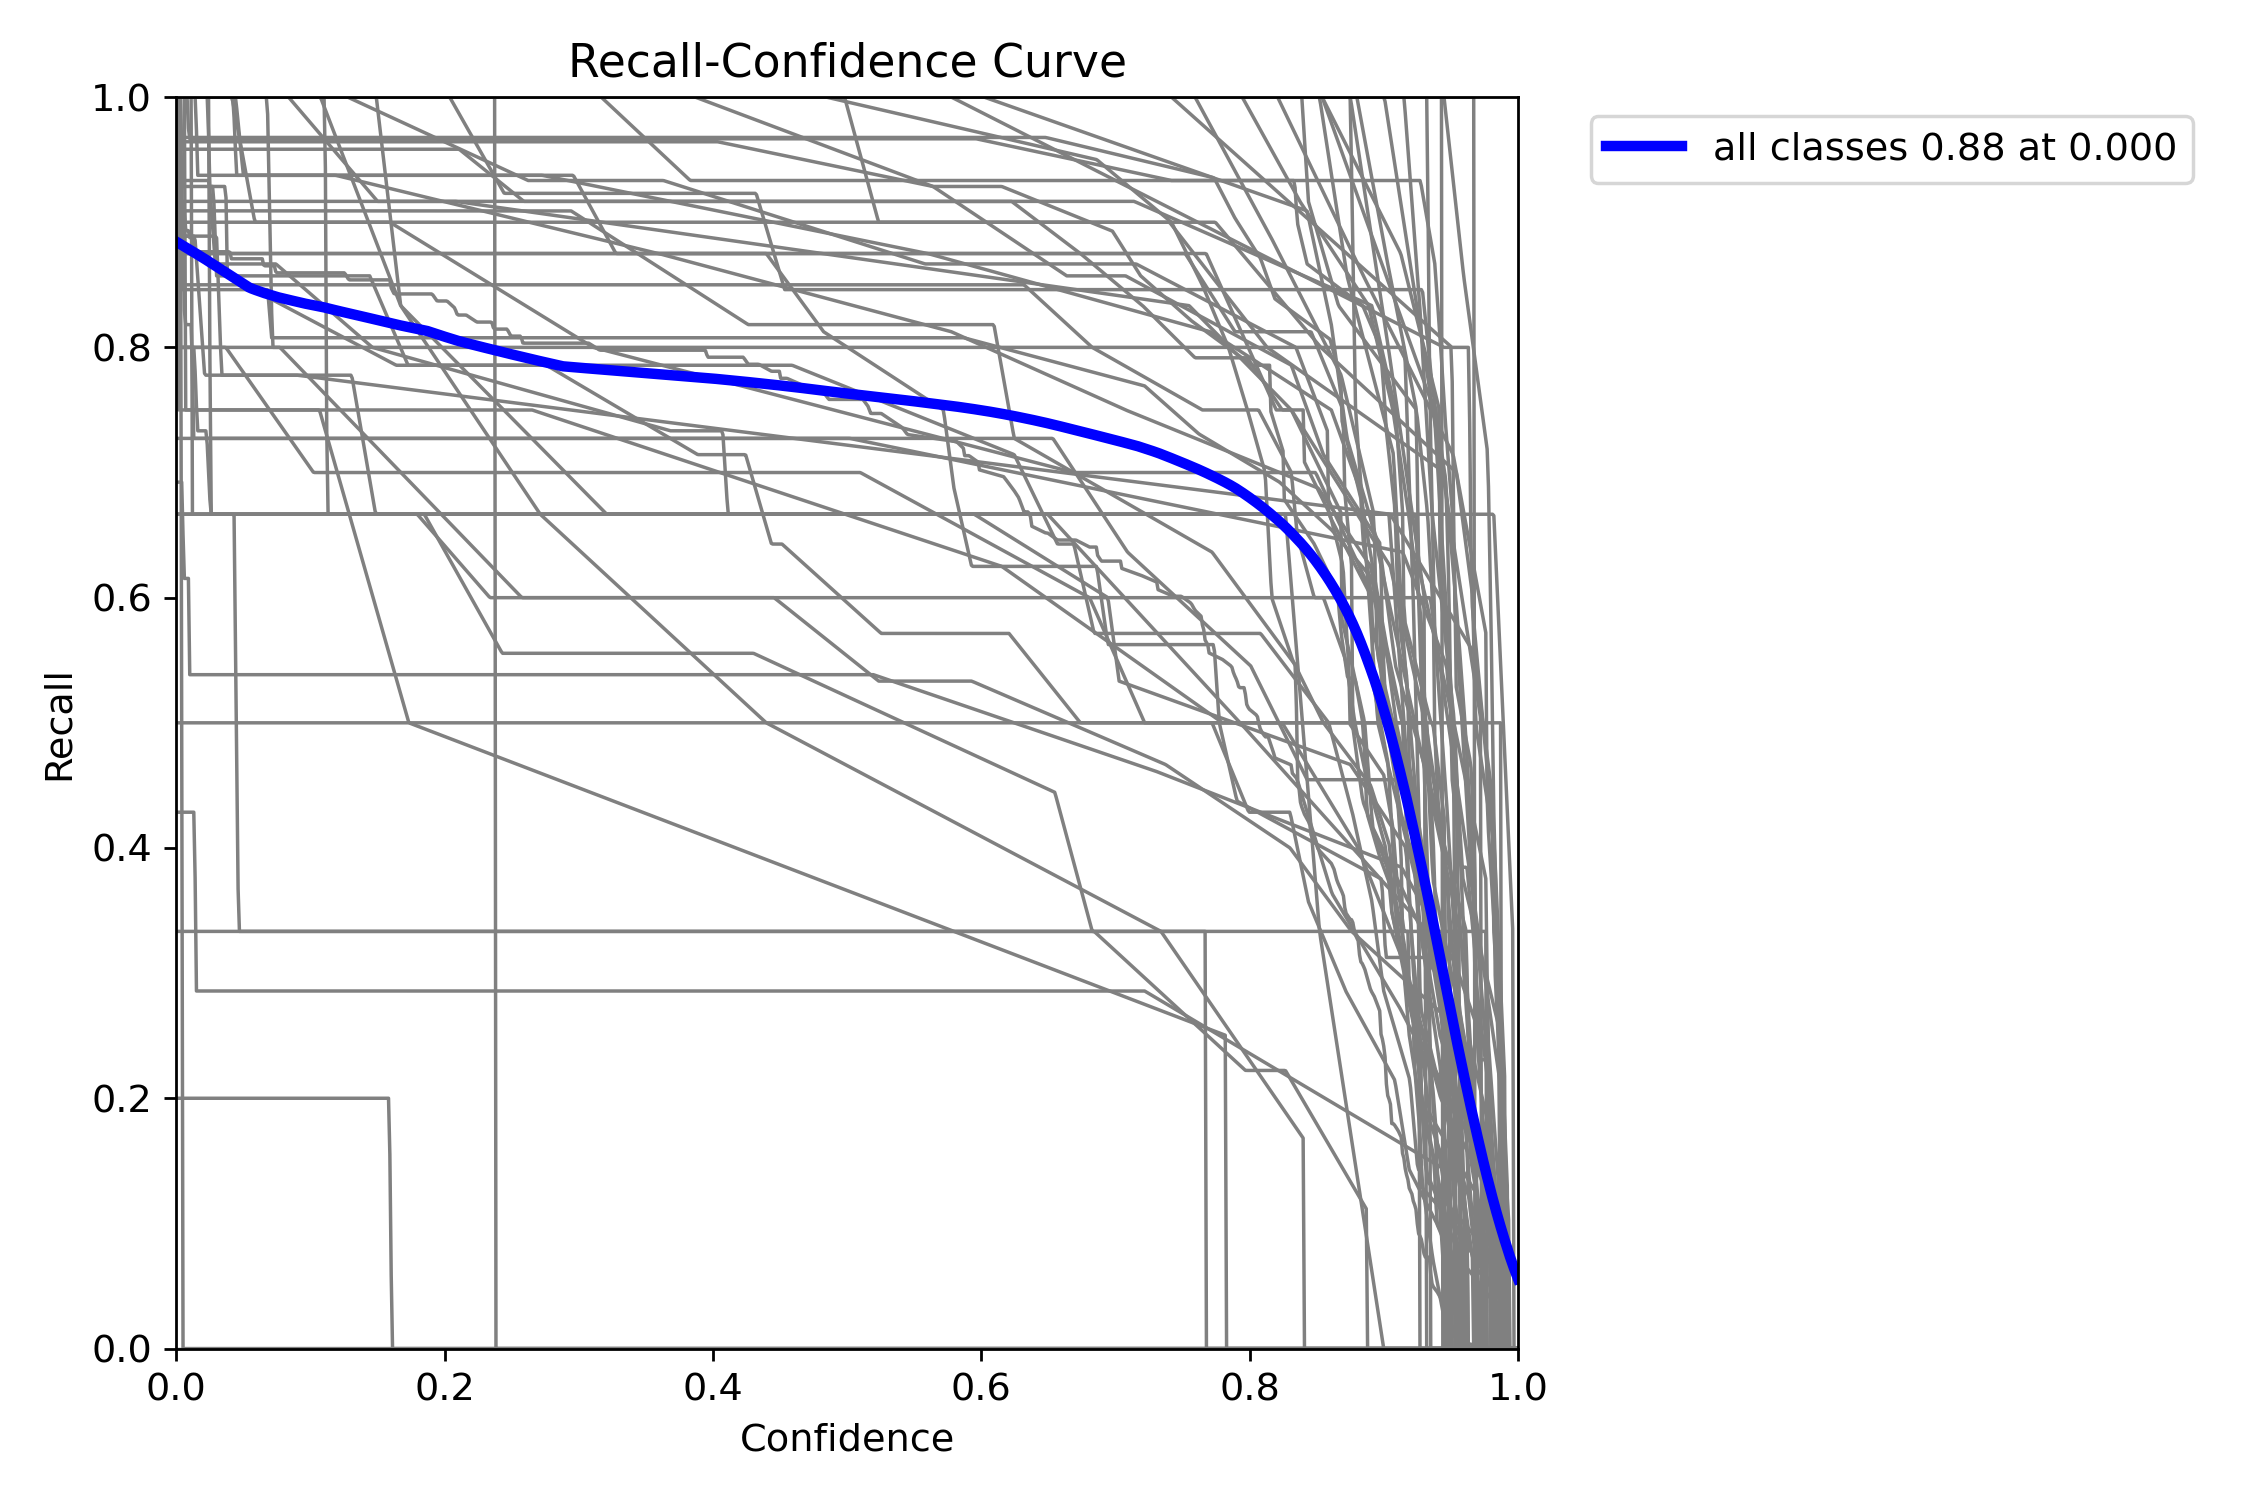

In [21]:
from IPython.display import Image
Image('/content/runs/detect/train/BoxR_curve.png')

### Validation Batch 1 Labels

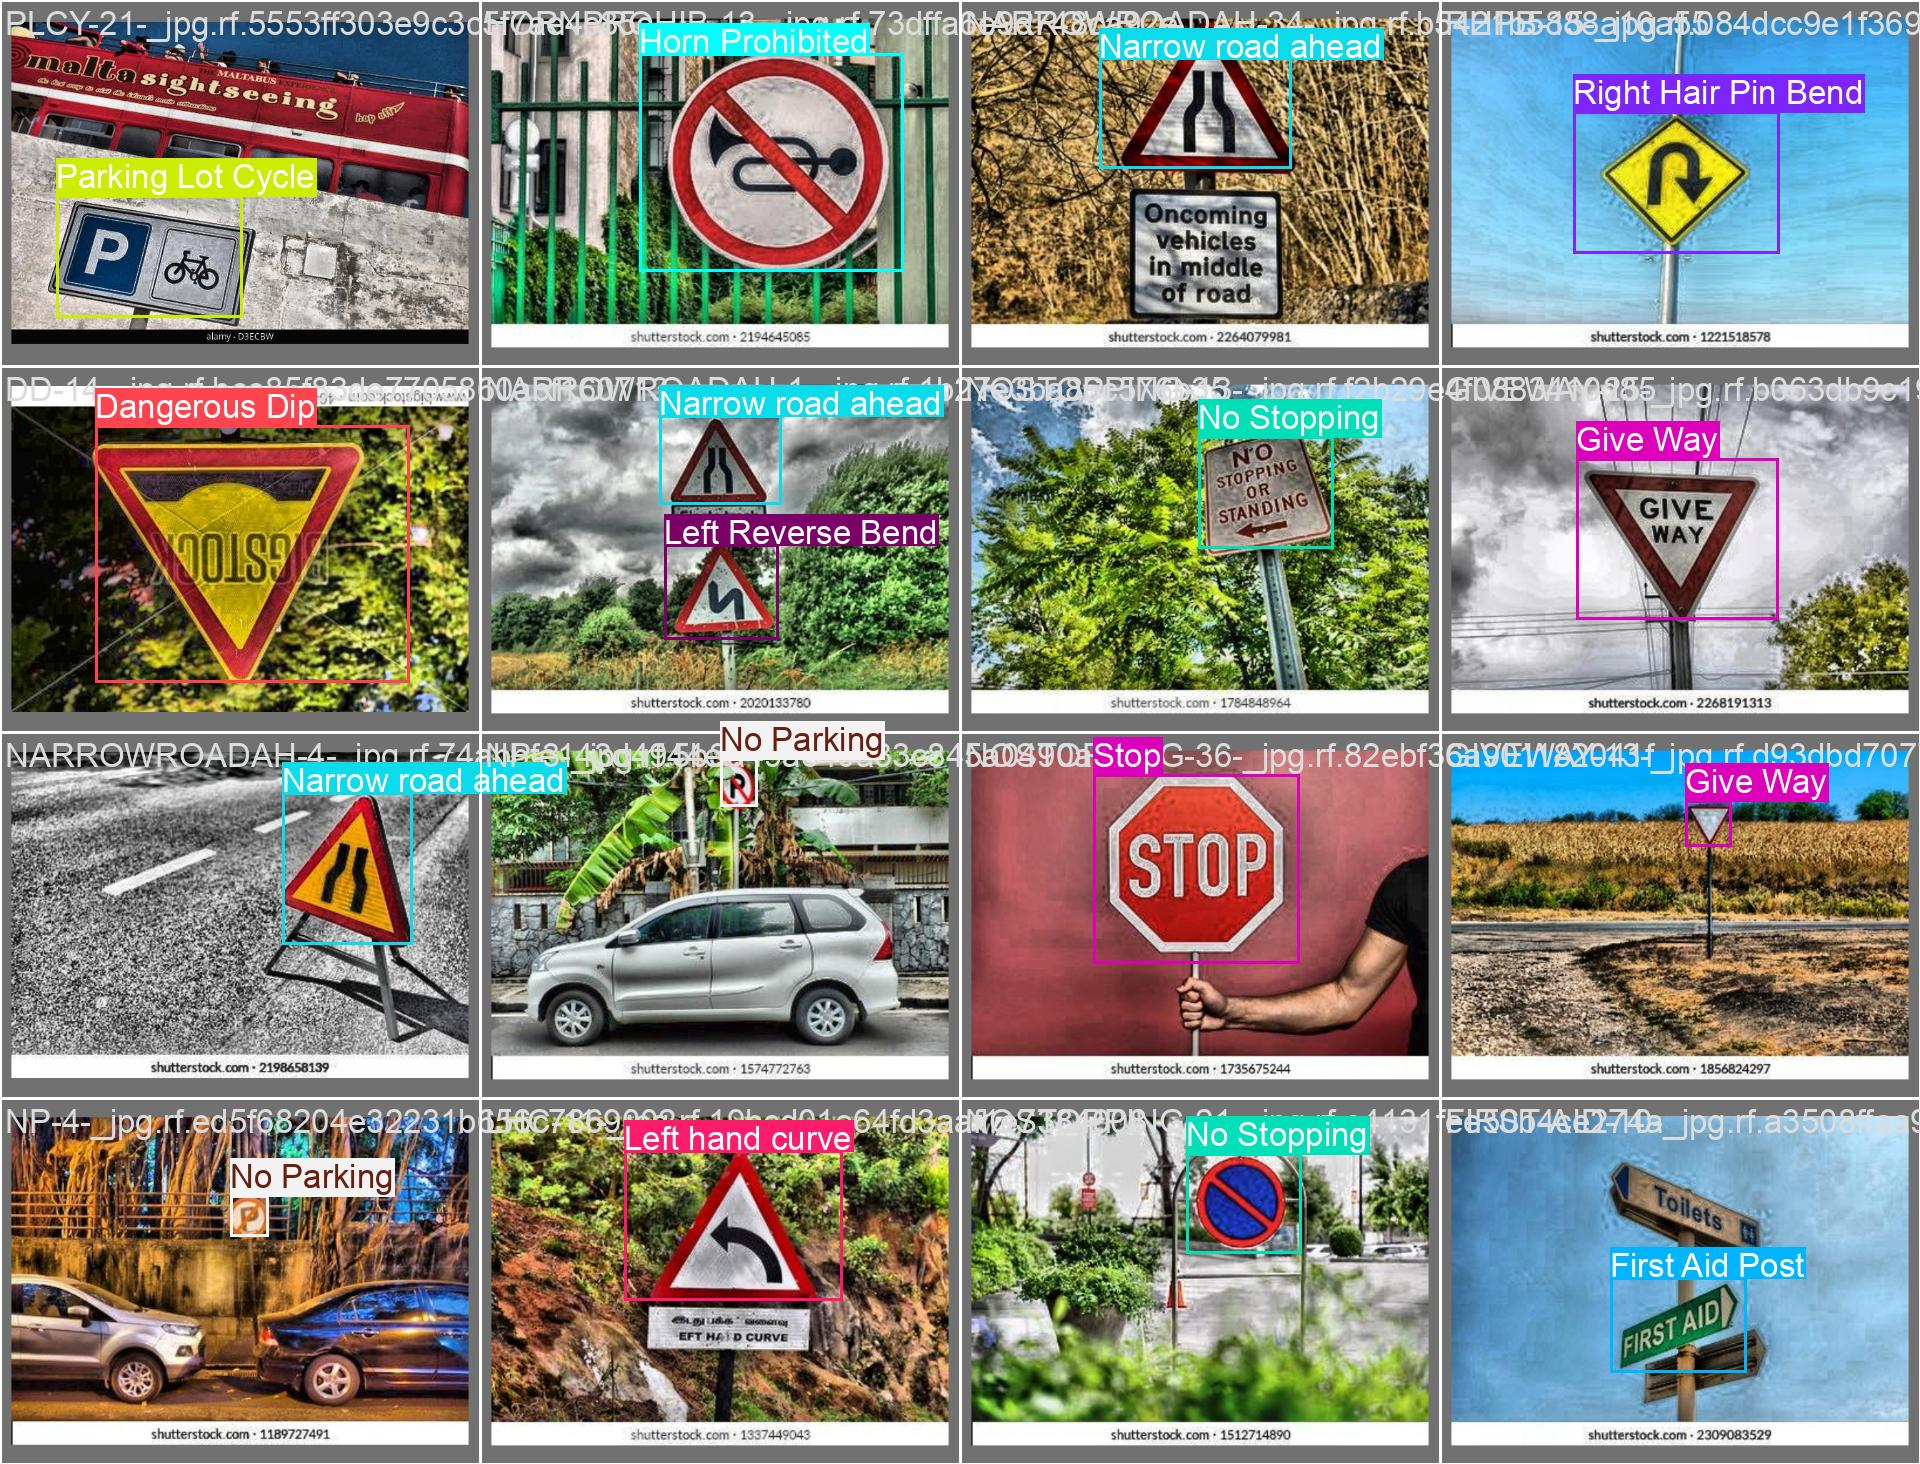

In [31]:
from IPython.display import Image
Image('/content/runs/detect/train/val_batch1_labels.jpg')

### Validation Batch 1 Predictions

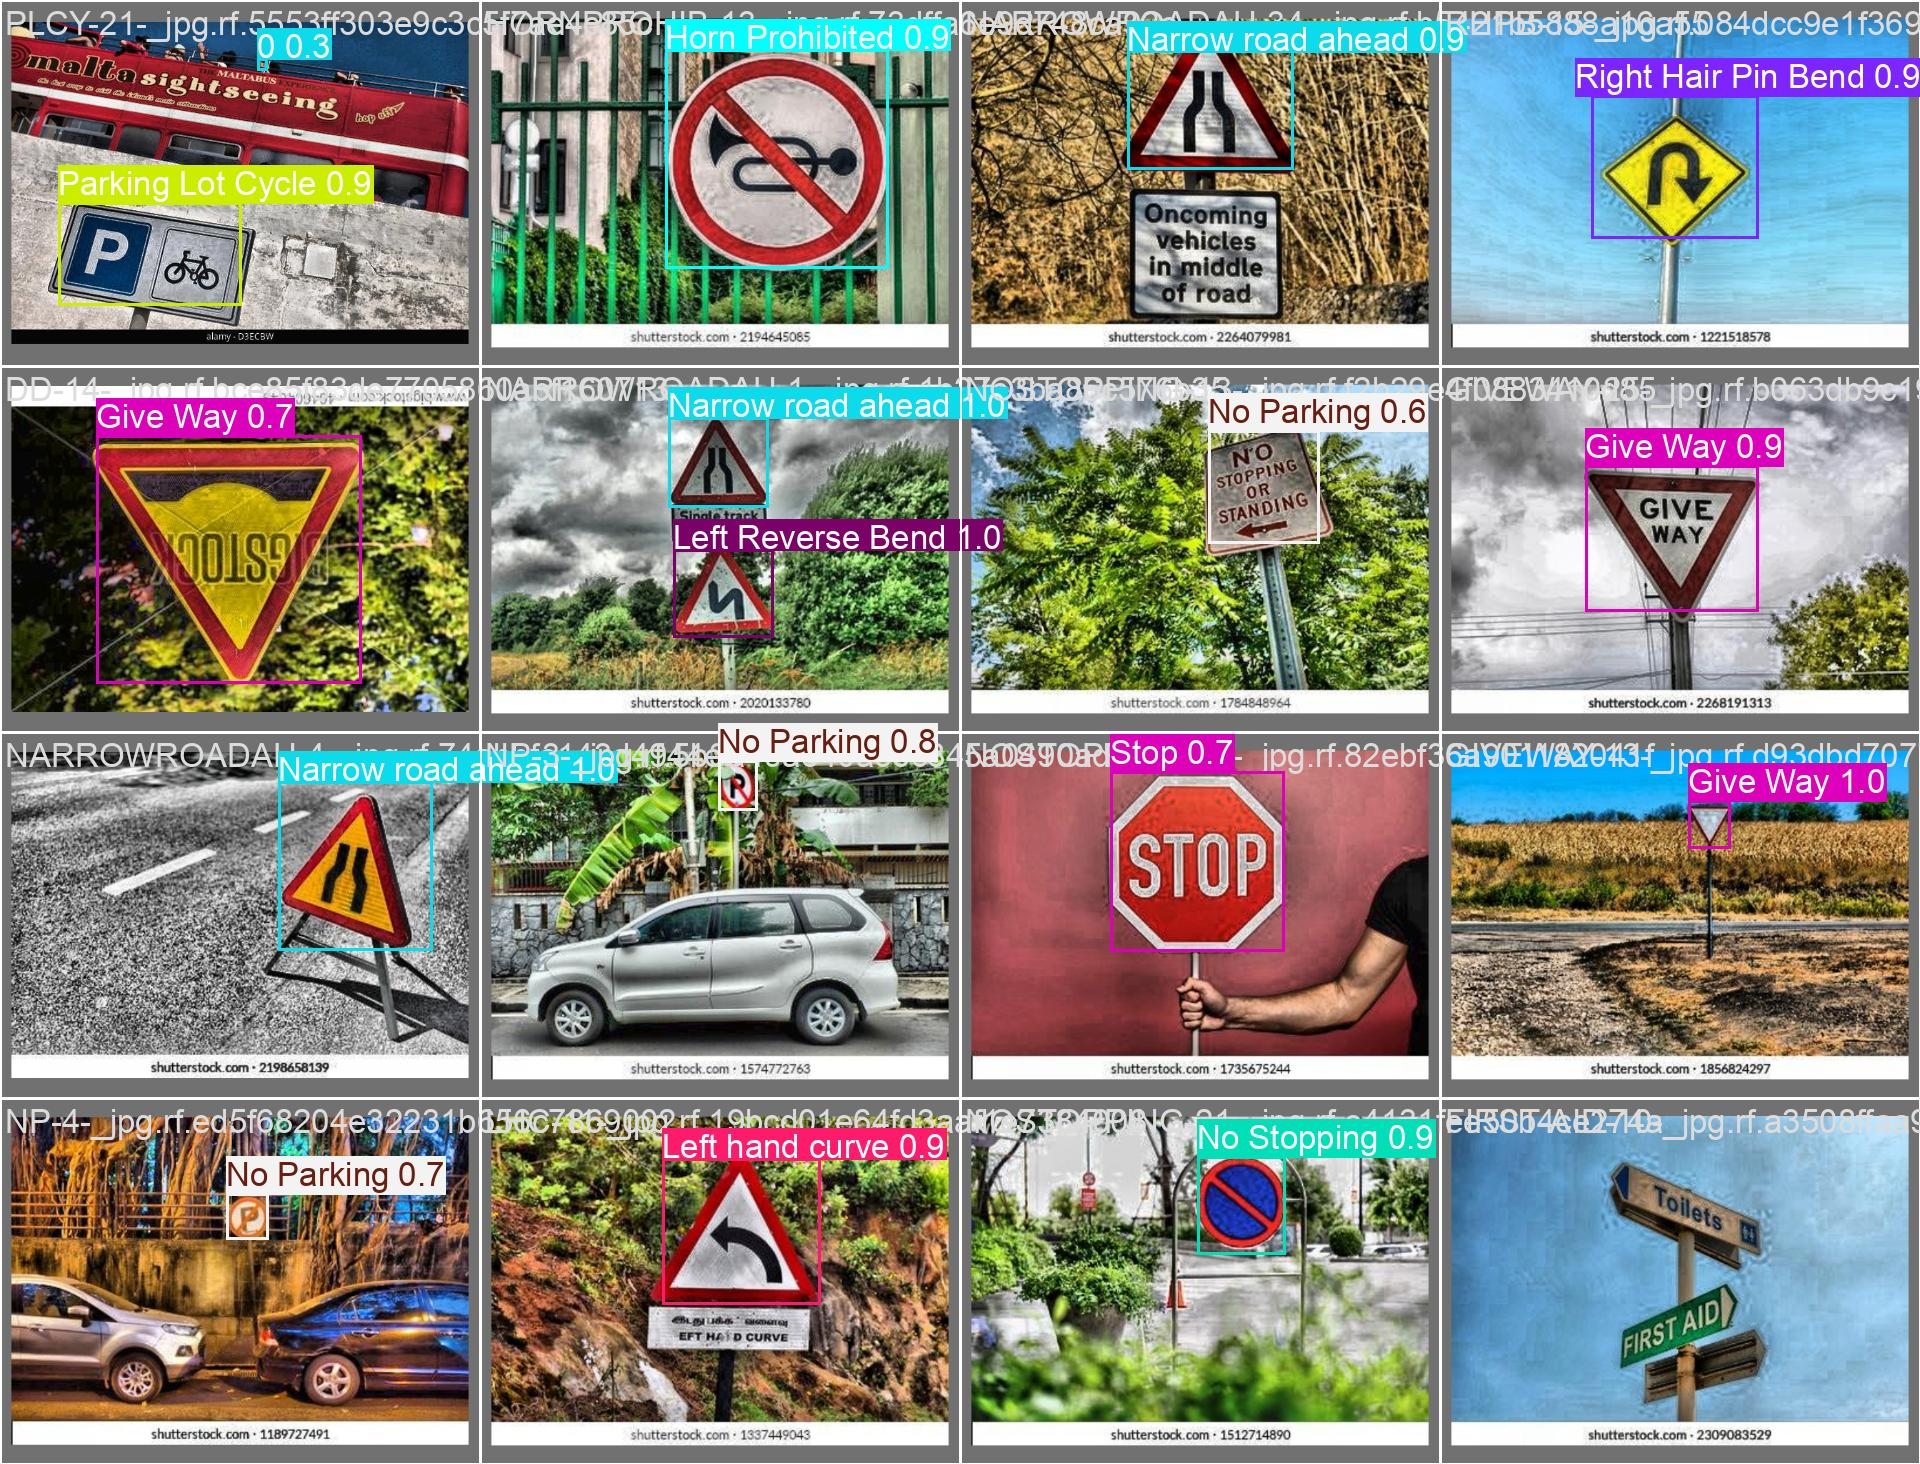

In [32]:
from IPython.display import Image
Image('/content/runs/detect/train/val_batch1_pred.jpg')

### Training Results (CSV)

In [33]:
import pandas as pd

results_df = pd.read_csv('/content/runs/detect/train/results.csv')
display(results_df)

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0       1   206.010         1.19706         4.66920         1.60050   
1       2   353.874         1.08096         3.81658         1.45918   
2       3   501.813         1.12455         3.18970         1.46088   
3       4   647.338         1.10916         2.76339         1.43740   
4       5   791.327         1.07056         2.44375         1.40118   
5       6   940.710         1.06307         2.26012         1.39458   
6       7  1088.380         1.02737         2.06427         1.36333   
7       8  1238.250         1.01878         1.94489         1.35348   
8       9  1382.270         0.99299         1.83073         1.33334   
9      10  1529.120         0.98400         1.72969         1.31656   
10     11  1673.700         0.97163         1.66051         1.31439   
11     12  1819.640         0.95500         1.59437         1.30498   
12     13  1964.950         0.95879         1.54493         1.30710   
13     14  2111.250         0.93352         1.46649         1.28761   
14     15  2257.710         0.92532         1.43065         1.28475   
15     16  2402.410         0.90870         1.37445         1.27541   
16     17  2548.870         0.90390         1.33839         1.27094   
17     18  2693.720         0.90163         1.30895         1.26264   
18     19  2838.060         0.89916         1.26503         1.26051   
19     20  2983.160         0.88954         1.24614         1.25009   
20     21  3127.130         0.88118         1.22686         1.25031   
21     22  3271.360         0.87724         1.19131         1.24094   
22     23  3416.120         0.87054         1.17392         1.23680   
23     24  3559.000         0.85214         1.14240         1.22343   
24     25  3702.050         0.85798         1.12679         1.22832   
25     26  3844.950         0.84667         1.09535         1.21601   
26     27  3990.900         0.83264         1.07326         1.21490   
27     28  4134.440         0.83164         1.05684         1.20987   
28     29  4277.650         0.82444         1.05296         1.20875   
29     30  4424.480         0.81836         1.01795         1.20186   
30     31  4570.420         0.81294         1.01161         1.20090   
31     32  4713.850         0.80533         1.00190         1.19698   
32     33  4857.060         0.80034         0.98896         1.19121   
33     34  5001.210         0.80114         0.97505         1.18793   
34     35  5145.540         0.79179         0.97074         1.18717   
35     36  5290.950         0.78579         0.94845         1.18134   
36     37  5436.140         0.78757         0.94348         1.18047   
37     38  5582.090         0.77531         0.93806         1.17607   
38     39  5727.040         0.77580         0.91551         1.16851   
39     40  5870.640         0.77237         0.91731         1.16687   
40     41  6010.970         0.76188         0.65215         1.21003   
41     42  6147.370         0.73194         0.60906         1.18365   
42     43  6284.640         0.71399         0.58588         1.16731   
43     44  6423.550         0.71050         0.57507         1.16274   
44     45  6562.740         0.70275         0.56743         1.15821   
45     46  6699.170         0.69429         0.55582         1.15197   
46     47  6835.550         0.68843         0.54826         1.14365   
47     48  6970.980         0.68439         0.54123         1.14180   
48     49  7107.880         0.67546         0.53235         1.13396   
49     50  7244.840         0.67166         0.53091         1.13498   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                0.53928            0.08693           0.03851   
1                0.54243            0.17503           0.12757   
2                0.51850            0.28550           0.26275   
3                0.55674            0.36968           0.39447   
4                0.59723            0.49212           0.5